<center>
<img src="./images/00_main_arcada.png" style="width:1400px">
</center>


# Machine Learning For Predictive Problems

# Lecture 2: Unsupervised Learning 

## Instructor:

> Leonardo Espinosa-Leal, PhD. **Senior Lecturer in Big Data Analytics.**<br/> 
(*email*: leonardo.espinosaleal@arcada.fi)<br/>
https://www.espinosaleal.me/

> Andrey Shcherbakov-parland, MSc. **Senior Lecturer in Information Technology.**<br/> 
(*email*: andrey.shcherbakov@arcada.fi)

> Amin Majd, PhD & DSc. **Researcher & Lecturer**<br/> 
(*email*:  amin.majd@arcada.fi)<br/>





# Goal for today
* Understand the basic principles of unsupervised learning.
* Identify the pros and cons of the main algorithms for preprocessing, scaling and clustering.

# Unsupervised Learning

* Unsupervised learning subsumes all kinds of machine learning where there is no known output, no teacher to instruct the learning algorithm. 

* In unsupervised learning, the learning algorithm is just shown the input data and asked to extract knowledge from this data.

## Dataset transformations 
* summarizes the essential characteristics of high dimensional data with fewer features.
* finding the parts or components that 'make up' the data.

## Clustering.
* Partition data into distinct groups of similar items.

## Unsupervised transformations 
Create a new representation of the data which might be easier for humans or other machine learning algorithms
to understand compared to the original representation of the data.

A common application of unsupervised transformations is dimensionality reduction

Another application for unsupervised transformations is finding the parts or components that “make up” the data


## The main challenge

* The evaluation is the main challenge that we have.
* In some cases we need to evaluate it manually.

## Unsupervised and Supervised

Another common application for unsupervised algorithms is as a preprocessing step for supervised algorithms. 

Learning a new representation of the data can sometimes improve the accuracy of supervised algorithms, or can lead to
reduced memory and time consumption.

1. <a href="#/57/1">Preprocessing and Scaling</a>:
   
2. <a href="#/60/1">Dimensionality Reduction, Feature Extraction, and Manifold Learning</a>:
   * Principal Component Analysis (PCA).
   * Non-Negative Matrix Factorization (NMF)
   * Manifold Learning with t-SNE

3. <a href="#/75/1">Clustering</a>:
   * k-Means Clustering.
   * Agglomerative Clustering.
   * DBSCAN.

# Preprocessing and Scaling

>Some algorithms are very sensitive to the scaling of data such as SVM and NNs.

>For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) assume that all features are centered around zero and have variance in the same order.

* *StandardScaler*: for each feature the mean is 0 and the variance is 1. Same magnitude.

* *MinMaxScaler*: shifts the data such that all features are exactly between 0 and 1.

* *MaxAbsScaler*: same than MinMaxScaler but on positive only data.

* *RobustScaler*: similar to StandardScaler but with the guarantee that they are on the same scale. It uses the median and quartiles. This makes the RobustScaler ignore data points that are very different from the rest (like measurement errors)

* *Normalizer*: It scales each data point such that the feature vector has a Euclidean length of 1.


* *PowerTransformer*: Applies a power transformation to each feature to make the data more Gaussian-like (Box-Cox can only be applied to strictly positive data).
* *QuantileTransformer*: Gaussian output and uniform output.
 

In [36]:
!pip install mglearn
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mglearn

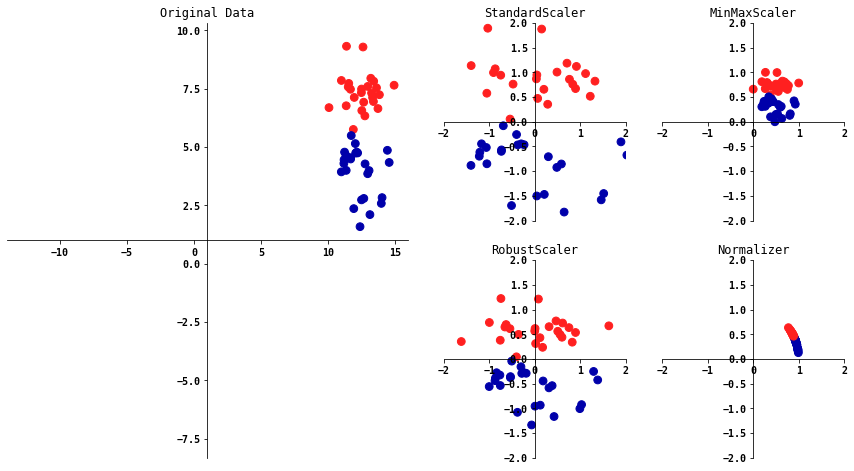

In [37]:
mglearn.plots.plot_scaling()

## A more descriptive example

In [38]:
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer      # You need the last version of scikit-learn!!!!

from sklearn.datasets import fetch_california_housing

print(__doc__)

dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target

# Take only 2 features to make visualization easier
# Feature of 0 has a long tail distribution.
# Feature 5 has a few but very large outliers.

Automatically created module for IPython interactive environment


In [14]:
X = X_full[:, [0, 5]]

distributions = [
    ('Unscaled data', X),
    ('Data after standard scaling',
        StandardScaler().fit_transform(X)),
    ('Data after min-max scaling',
        MinMaxScaler().fit_transform(X)),
    ('Data after max-abs scaling',
        MaxAbsScaler().fit_transform(X)),
    ('Data after robust scaling',
        RobustScaler(quantile_range=(25, 75)).fit_transform(X)),
    ('Data after power transformation (Yeo-Johnson)',
     PowerTransformer(method='yeo-johnson').fit_transform(X)),
    ('Data after power transformation (Box-Cox)',
     PowerTransformer(method='box-cox').fit_transform(X)),
    ('Data after quantile transformation (gaussian pdf)',
        QuantileTransformer(output_distribution='normal')
        .fit_transform(X)),
    ('Data after quantile transformation (uniform pdf)',
        QuantileTransformer(output_distribution='uniform')
        .fit_transform(X)),
    ('Data after sample-wise L2 normalizing',
        Normalizer().fit_transform(X)),
]

# scale the output between 0 and 1 for the colorbar
y = minmax_scale(y_full)

# plasma does not exist in matplotlib < 1.5
cmap = getattr(cm, 'plasma_r', cm.hot_r)

In [40]:
def create_axes(title, figsize=(20, 8)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return ((ax_scatter, ax_histy, ax_histx),
            (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
            ax_colorbar)

In [41]:
def plot_distribution(axes, X, y, hist_nbins=50, title="",
                      x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker='o', s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(X[:, 1], bins=hist_nbins, orientation='horizontal',
                 color='grey', ec='grey')
    hist_X1.axis('off')

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(X[:, 0], bins=hist_nbins, orientation='vertical',
                 color='grey', ec='grey')
    hist_X0.axis('off')

In [42]:
def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(axarr[0], X, y, hist_nbins=200,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Full data")

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = (
        np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) &
        np.all(X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1))
    plot_distribution(axarr[1], X[non_outliers_mask], y[non_outliers_mask],
                      hist_nbins=50,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Zoom-in")

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(ax_colorbar, cmap=cmap,
                              norm=norm, orientation='vertical',
                              label='Color mapping for values of y')


### california housing

In [43]:
print(dataset.feature_names)
print(dataset.target_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedHouseVal']


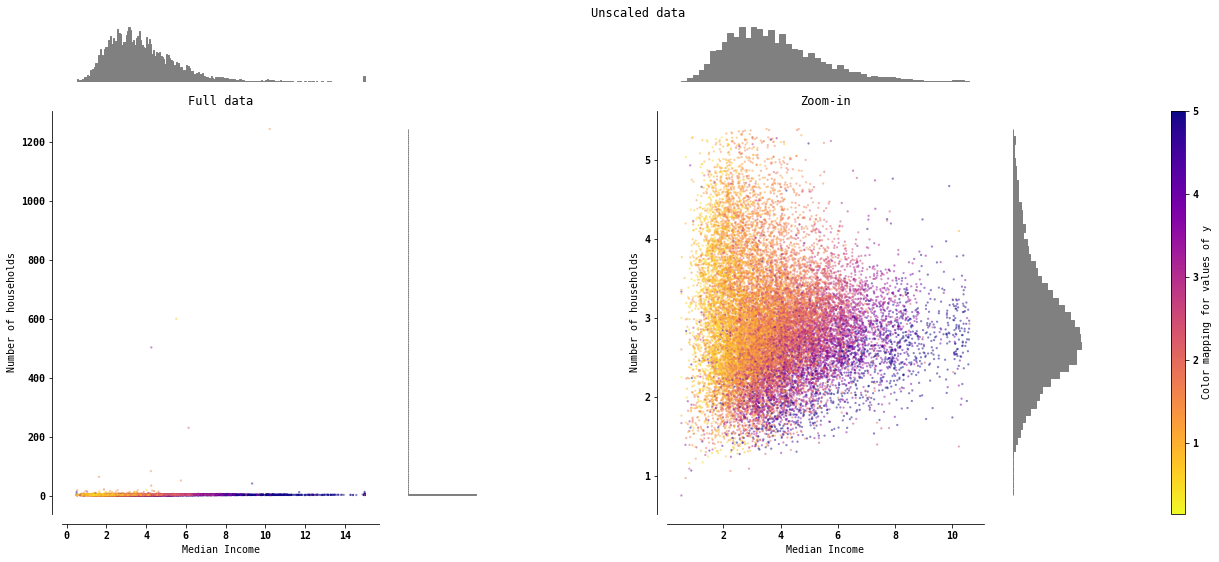

In [44]:
make_plot(0)

### StandardScaler
For each feature the mean is 0 and the variance is 1. Same magnitude.

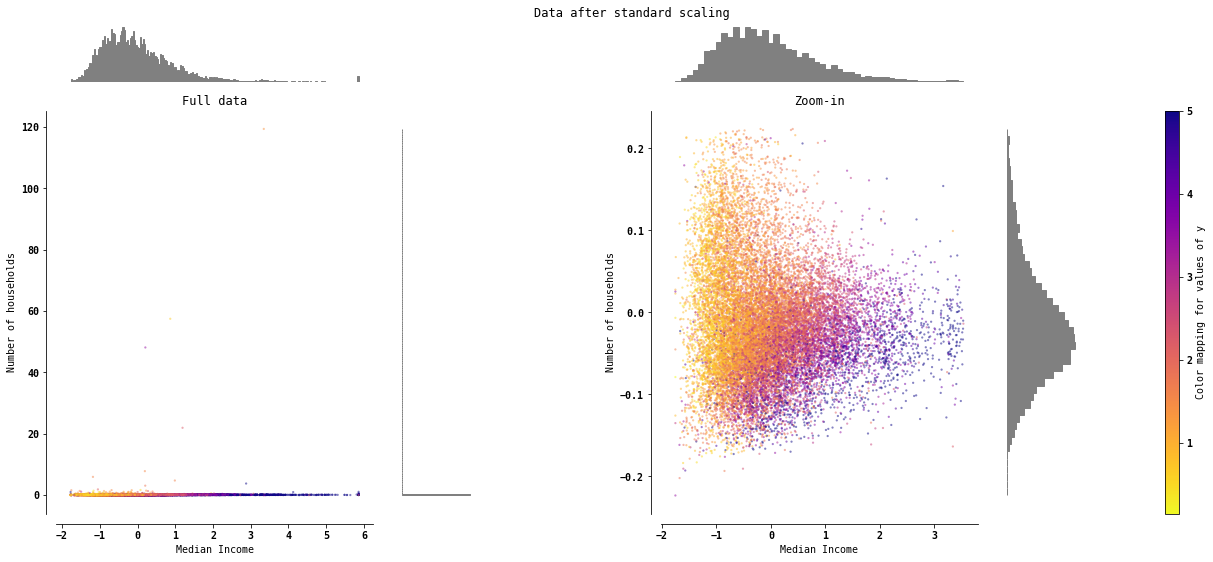

In [45]:
make_plot(1)

### MinMaxScaler
Shifts the data such that all features are exactly between 0 and 1.

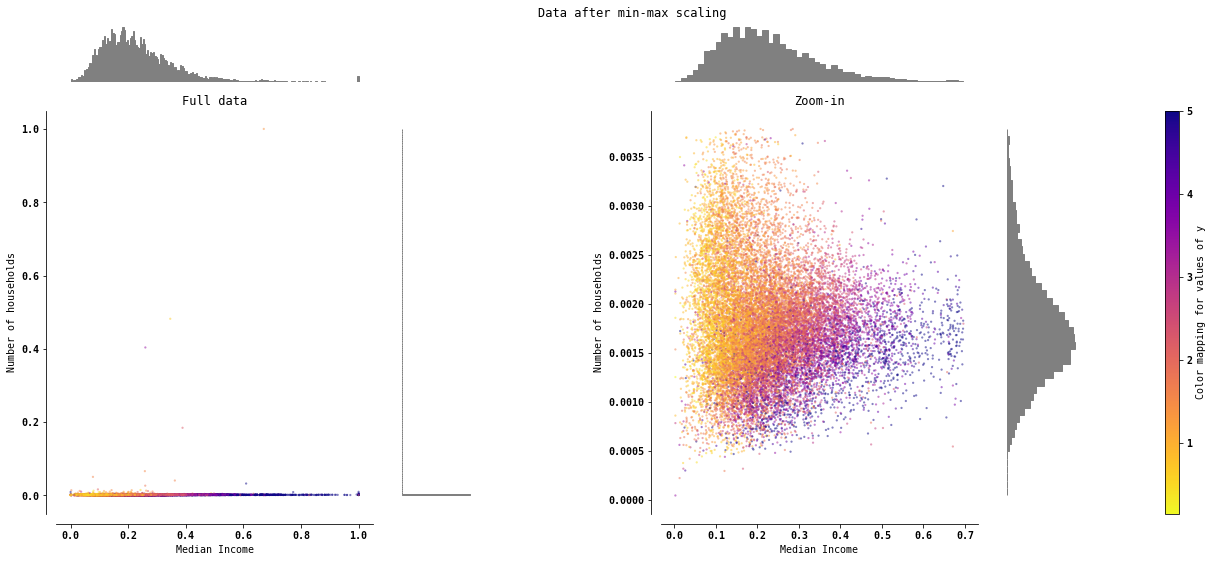

In [46]:
make_plot(2)

### MaxAbsScaler
same than MinMaxScaler but on positive only data.

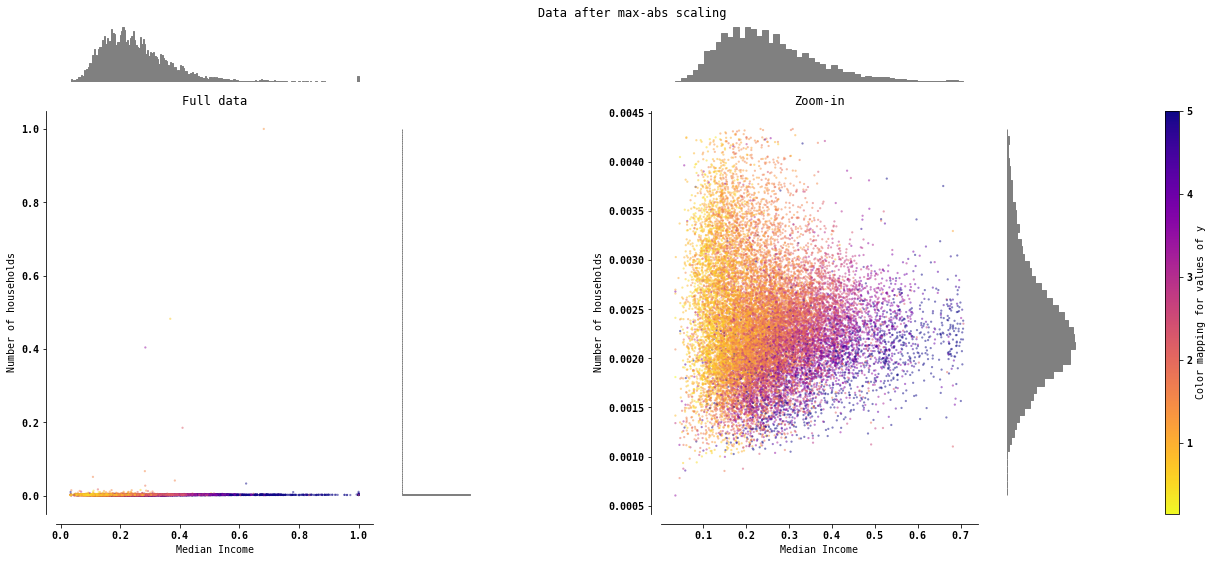

In [47]:
make_plot(3)

### RobustScaler
similar to *StandardScaler* but with the guarantee that they are on the same scale. It uses the median and quartiles.

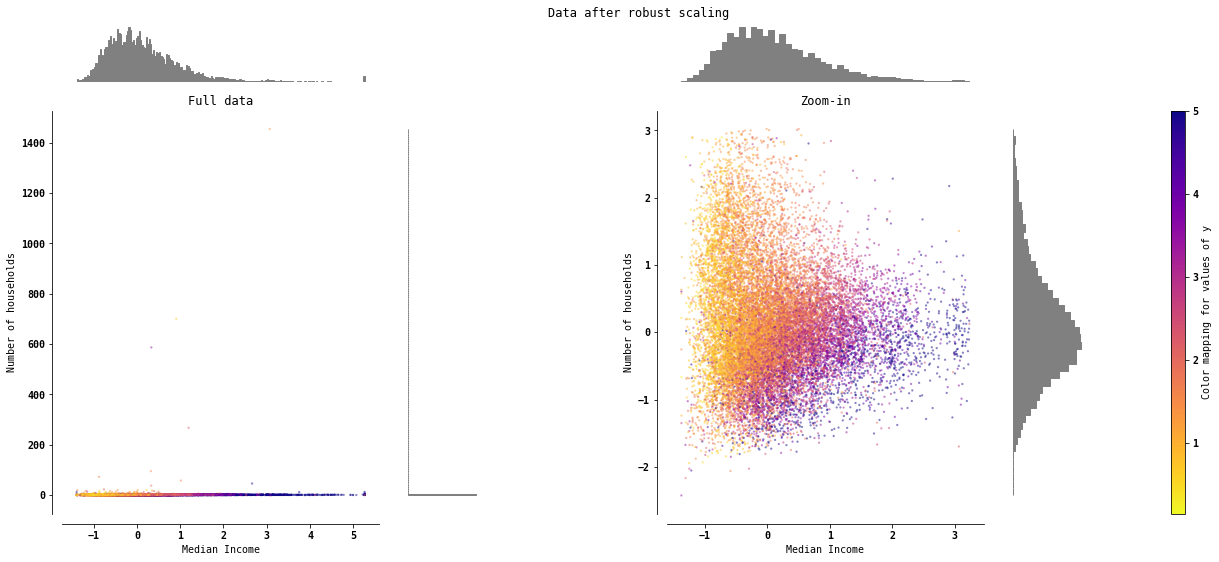

In [48]:
make_plot(4)

### PowerTransformer (Yeo-Johnson)
Applies a power transformation to each feature to make the data more Gaussian-like. Can be applied to both positive and negative data.
*Yeo and R.A. Johnson, “A New Family of Power Transformations to Improve Normality or Symmetry”, Biometrika 87.4 (2000)*

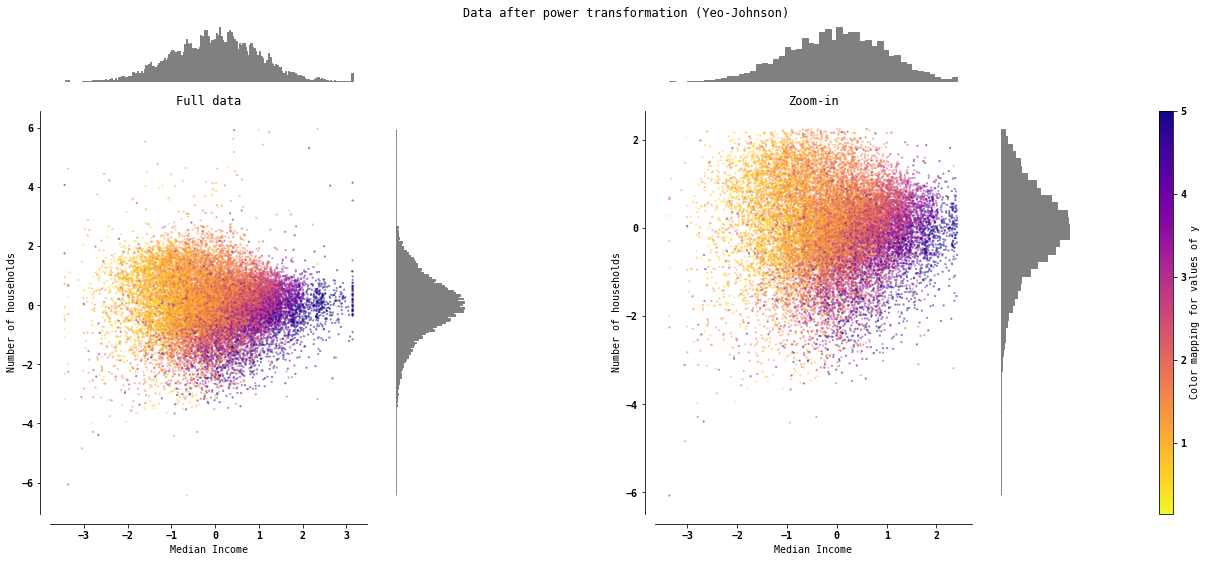

In [49]:
make_plot(5)

### PowerTransformer (Box-Cox) 
Applies a power transformation to each feature to make the data more Gaussian-like.  Can only be applied to strictly positive data.
*G.E.P. Box and D.R. Cox, “An Analysis of Transformations”, Journal of the Royal Statistical Society B, 26, 211-252 (1964).*

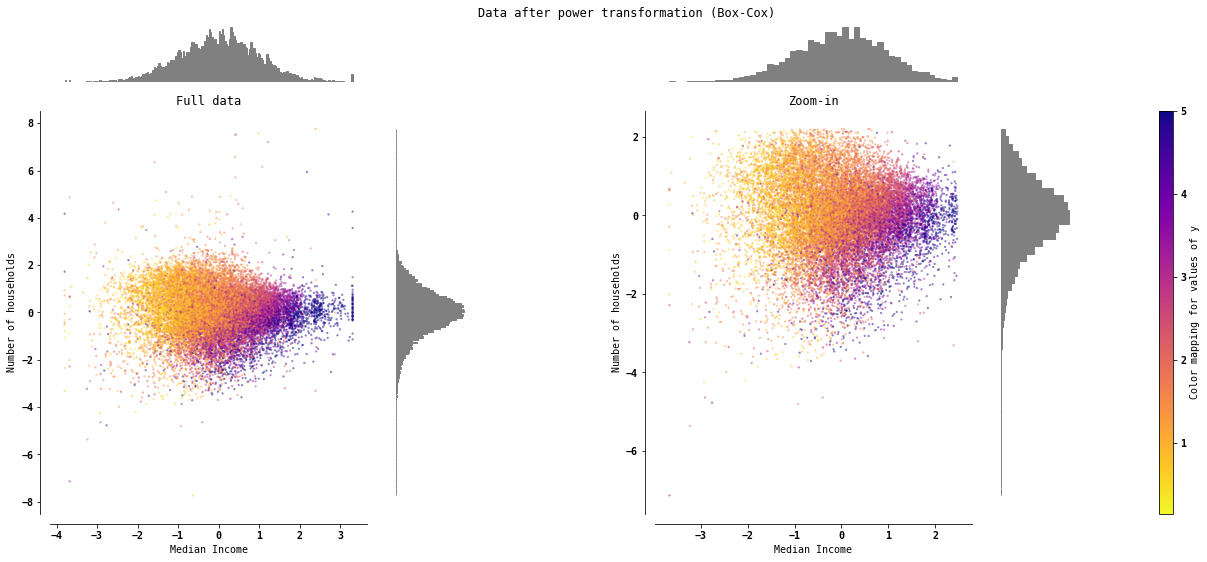

In [50]:
make_plot(6)

### QuantileTransformer (Gaussian output)
 Gaussian output and uniform output.

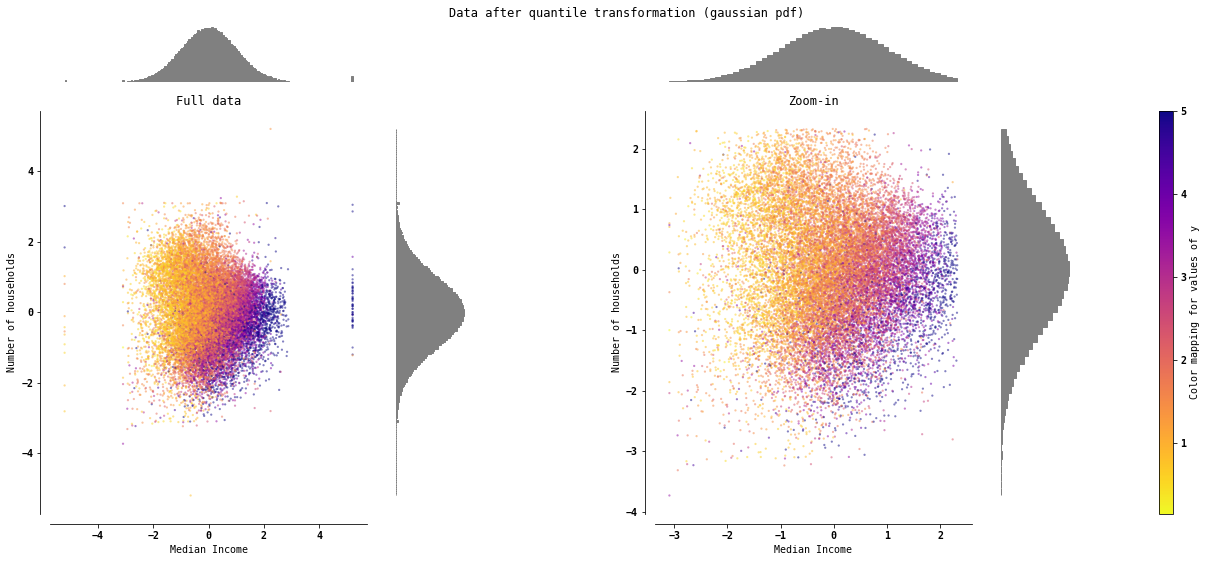

In [51]:
make_plot(7)

### QuantileTransformer (uniform output)
Gaussian output and uniform output.

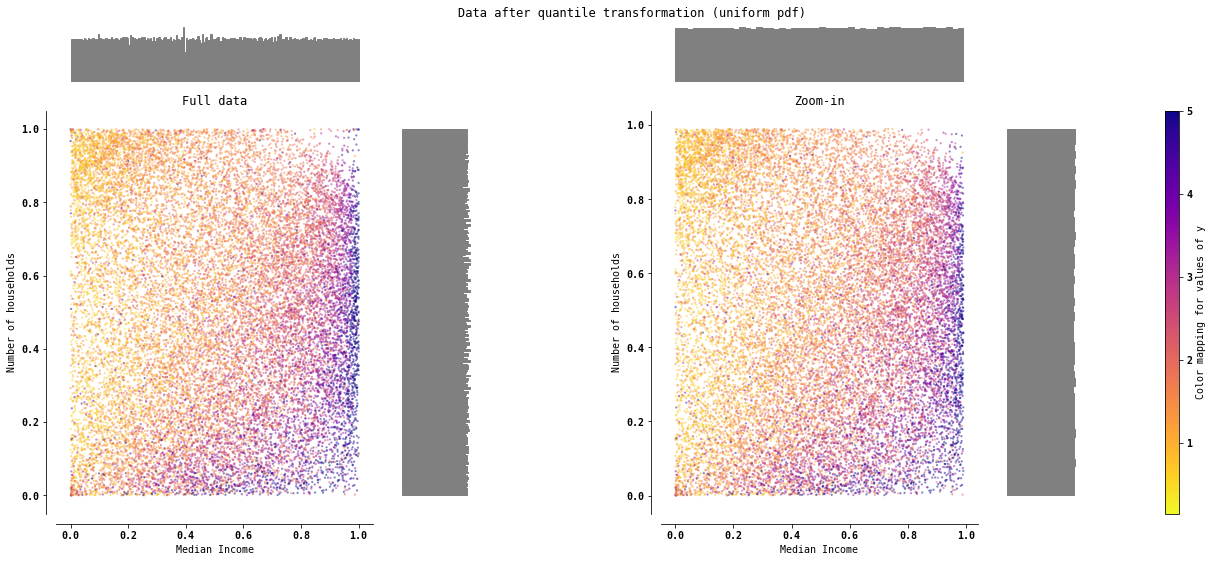

In [52]:
make_plot(8)

### Normalizer
It scales each data point such that the feature vector has a Euclidean length of 1. 

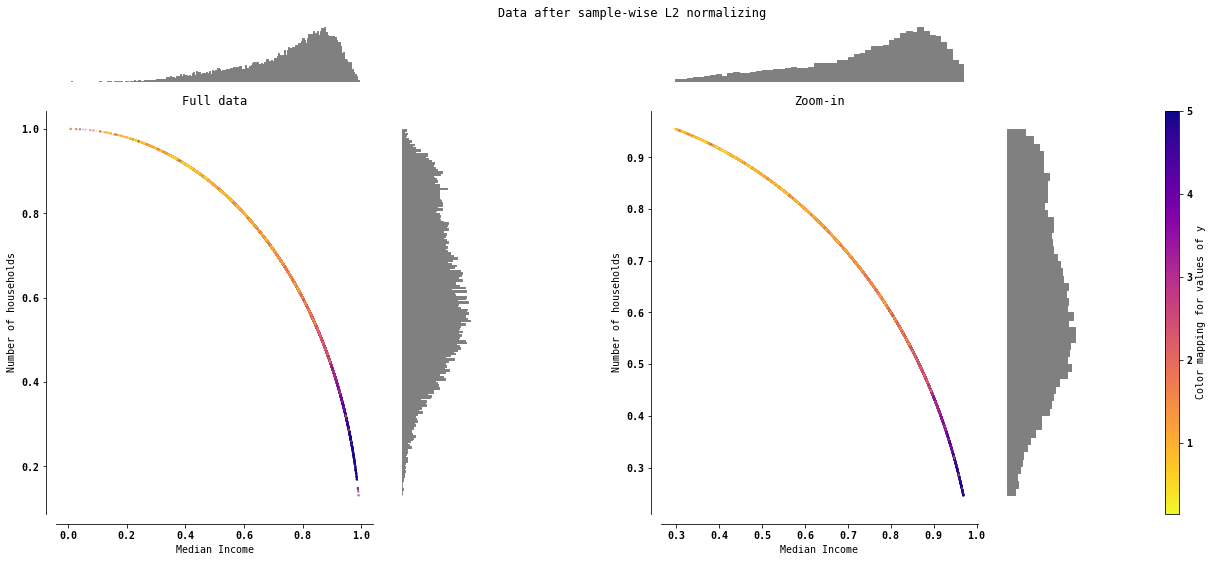

In [53]:
make_plot(9)

## Applying Data Transformations

In [54]:
file_path='https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
names_list = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
df = pd.read_csv(file_path,header=None,names=names_list)

# We add a Years column  
df['Years'] = df['Rings'] + 1.5

# We change the M,F and I categorical variables as numerical using 0,1 and 2.
replace_list = {"Sex" : {"M": 0, "F" : 1, "I": 2}}
df.replace(replace_list,inplace=True)
# If we want, we can inspect the dataset.

In [55]:
# Here we turn into numpy arrays
X_cls = df.iloc[:,1:8].values  # dataset
y_cls = df['Sex'].values   # target classification
y_reg = df['Years'].values   # target regression

# Reformulate the problem using the Abalone dataset, now binary Male or Female is the target.
#First remove the rows for Sex I (Infant) = 2.

df_bin = df[df.Sex !=2]

# Here we turn into numpy arrays
X_bin = df_bin.iloc[:,1:].values
y_bin = df_bin.iloc[:,0].values

In [56]:
df.describe()

Sex       Length     Diameter       Height  Whole weight  \
count  4177.000000  4177.000000  4177.000000  4177.000000   4177.000000   
mean      0.955470     0.523992     0.407881     0.139516      0.828742   
std       0.827815     0.120093     0.099240     0.041827      0.490389   
min       0.000000     0.075000     0.055000     0.000000      0.002000   
25%       0.000000     0.450000     0.350000     0.115000      0.441500   
50%       1.000000     0.545000     0.425000     0.140000      0.799500   
75%       2.000000     0.615000     0.480000     0.165000      1.153000   
max       2.000000     0.815000     0.650000     1.130000      2.825500   

       Shucked weight  Viscera weight  Shell weight        Rings        Years  
count     4177.000000     4177.000000   4177.000000  4177.000000  4177.000000  
mean         0.359367        0.180594      0.238831     9.933684    11.433684  
std          0.221963        0.109614      0.139203     3.224169     3.224169  
min          0.001000        0.000500      0.001500     1.000000     2.500000  
25%          0.186000        0.093500      0.130000     8.000000     9.500000  
50%          0.336000        0.171000      0.234000     9.000000    10.500000  
75%          0.502000        0.253000      0.329000    11.000000    12.500000  
max          1.488000        0.760000      1.005000    29.000000    30.500000

In [57]:
df

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0       0   0.455     0.365   0.095        0.5140          0.2245   
1       0   0.350     0.265   0.090        0.2255          0.0995   
2       1   0.530     0.420   0.135        0.6770          0.2565   
3       0   0.440     0.365   0.125        0.5160          0.2155   
4       2   0.330     0.255   0.080        0.2050          0.0895   
...   ...     ...       ...     ...           ...             ...   
4172    1   0.565     0.450   0.165        0.8870          0.3700   
4173    0   0.590     0.440   0.135        0.9660          0.4390   
4174    0   0.600     0.475   0.205        1.1760          0.5255   
4175    1   0.625     0.485   0.150        1.0945          0.5310   
4176    0   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  Years  
0             0.1010        0.1500     15   16.5  
1             0.0485        0.0700      7    8.5  
2             0.1415        0.2100      9   10.5  
3             0.1140        0.1550     10   11.5  
4             0.0395        0.0550      7    8.5  
...              ...           ...    ...    ...  
4172          0.2390        0.2490     11   12.5  
4173          0.2145        0.2605     10   11.5  
4174          0.2875        0.3080      9   10.5  
4175          0.2610        0.2960     10   11.5  
4176          0.3765        0.4950     12   13.5  

[4177 rows x 10 columns]

In [58]:
from matplotlib import rc
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 25}
rc('font', **font) 

plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['lines.linewidth'] = 5.0
plt.rcParams['lines.markersize'] = 15.0

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

In [59]:
df['Sex'].value_counts()

0    1528
2    1342
1    1307
Name: Sex, dtype: int64

In [60]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_bin,y_bin, random_state=42)
svm = SVC()
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))


Test set accuracy: 0.53


In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [62]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.55


In [63]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)
# scoring on the scaled test set
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.56


### Another example

UCI ML Breast Cancer Wisconsin (Diagnostic) dataset (https://goo.gl/U2Uwz2).

In [64]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [65]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [66]:
# transform train data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("\n")
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("\n")
print("per-feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))

transformed shape: (426, 30)


per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]


per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [67]:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


*Some of the features are even outside the 0–1 range!* WRONG!!!

In [68]:
from sklearn.datasets import make_blobs

def get_plot1():
    # make synthetic data
    X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
    # split it into training and test sets
    X_train, X_test = train_test_split(X, random_state=5, test_size=.1)
    # plot the training and test sets
    fig, axes = plt.subplots(1, 3, figsize=(22, 8))

    axes[0].scatter(X_train[:, 0], X_train[:, 1],
        c=mglearn.cm2(0), label="Training set", s=60)
    axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
        c=mglearn.cm2(1), label="Test set", s=60)
    axes[0].legend(loc='upper left')
    axes[0].set_title("Original Data")

    # scale the data using MinMaxScaler
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # visualize the properly scaled data
    axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
        c=mglearn.cm2(0), label="Training set", s=60)
    axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
        c=mglearn.cm2(1), label="Test set", s=60)
    axes[1].set_title("Scaled Data")

    # rescale the test set separately
    # so test set min is 0 and test set max is 1
    # DO NOT DO THIS! For illustration purposes only.
    test_scaler = MinMaxScaler()
    test_scaler.fit(X_test)
    X_test_scaled_badly = test_scaler.transform(X_test)

    # visualize wrongly scaled data
    axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
        c=mglearn.cm2(0), label="training set", s=60)
    axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
        marker='^', c=mglearn.cm2(1), label="test set", s=60)
    axes[2].set_title("Improperly Scaled Data")
    for ax in axes:
        ax.set_xlabel("Feature 0")
        ax.set_ylabel("Feature 1")

In [69]:
from matplotlib import rc
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 15}
rc('font', **font) 

plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 10.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

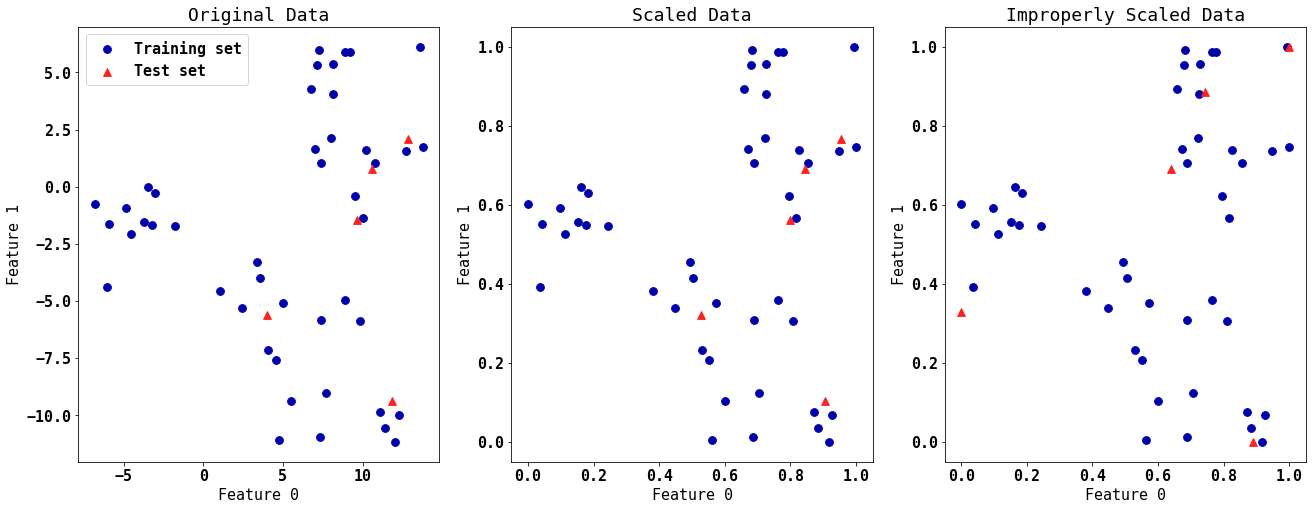

In [70]:
get_plot1()

## Shortcuts and Efficient Alternatives

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# calling fit and transform in sequence (using method chaining)
X_scaled = scaler.fit(X).transform(X)

# same result, but more efficient computation
X_scaled_d = scaler.fit_transform(X)

### The Effect of Preprocessing on Supervised Learning

In [72]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,random_state=0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.94


### Using a scaler before fitting the SVC

In [73]:
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)
# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


In [74]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)
# scoring on the scaled test set
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


# Conclusion

>As we saw before, the effect of scaling the data is quite significant. Even though scaling the data doesn't involve any complicated math, it is good practice to use the scaling mechanisms provided by scikit-learn instead of reimplementing them yourself, as it's easy to make mistakes even in these simple computations.

>You can also easily replace one preprocessing algorithm with another by changing the class you use, as all of the preprocessing classes have the same interface, consisting of the fit and transform methods:

<center>
<img src="./images/00_questions.jpg" style="width:1200px">
</center>

<center>
<img src="./images/00_hands-on.jpg" style="width:1200px">
</center>

## hands-on exercise

In [75]:
import pandas as pd
from sklearn.svm import SVC

In [76]:
df_red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=';')
df_white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",sep=';')

df_red['type'] = 0
df_white['type'] = 1

df_allwine = pd.concat([df_red, df_white])

# Here we turn into numpy arrays
Xw = df_allwine.iloc[:,:10].values  # dataset
yw_bin = df_allwine['type'].values   # target classification
yw_reg = df_allwine['alcohol'].values   # target regression
yw_mul = df_allwine['quality'].values   # multiclass regression

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xw, yw_mul,random_state=0)

svm = SVC()
# Train the SVM model 

# scoring on the scaled test set and print it


# preprocessing using zero mean and unit variance scaling


# learning an SVM on the scaled training data

# scoring on the scaled test set

In [ ]:
# The same for linear regression



In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xw, yw_mul,random_state=0)

svm = SVC()
svm.fit(X_train, y_train)
# scoring on the scaled test set
print("SVM test accuracy : {:.2f}".format(svm.score(X_test, y_test)))

# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)
# scoring on the scaled test set
print("SVM test scaled accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy : 0.43
SVM test scaled accuracy: 0.55


# Dimensionality Reduction, Feature Extraction, and Manifold Learning

The most common motivations for transforming data using unsupervised learning are visualization, compressing the data, and finding a representation that is more informative for further processing.

* Principal component analysis (PCA). 
* Non-negative matrix factorization (NMF), commonly used for feature extraction, and 
* t-SNE, commonly used for visualization using two-dimensional scatter plots.

# Principal Component Analysis (PCA)

* Principal component analysis is a method that rotates the dataset in a way such that the rotated features are statistically uncorrelated. 
* This rotation is often followed by selecting only a subset of the new features, according to how important they are for explaining the data.

In [78]:
from matplotlib import rc
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 8}
rc('font', **font) 

plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 10.0

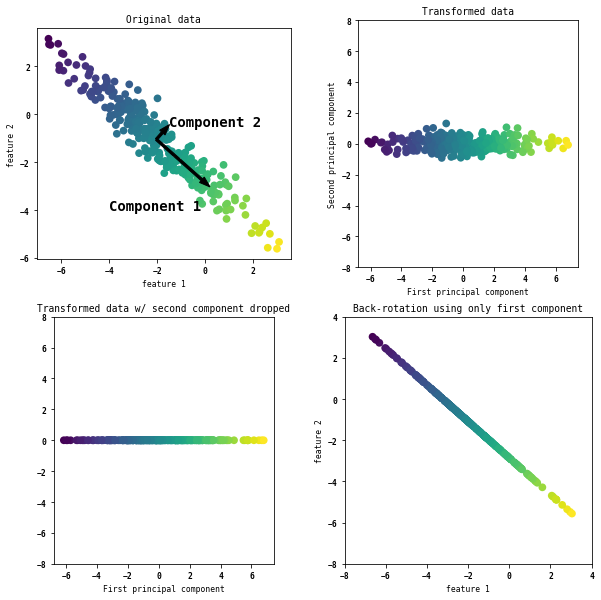

In [79]:
mglearn.plots.plot_pca_illustration()

https://www.youtube.com/watch?v=HMOI_lkzW08

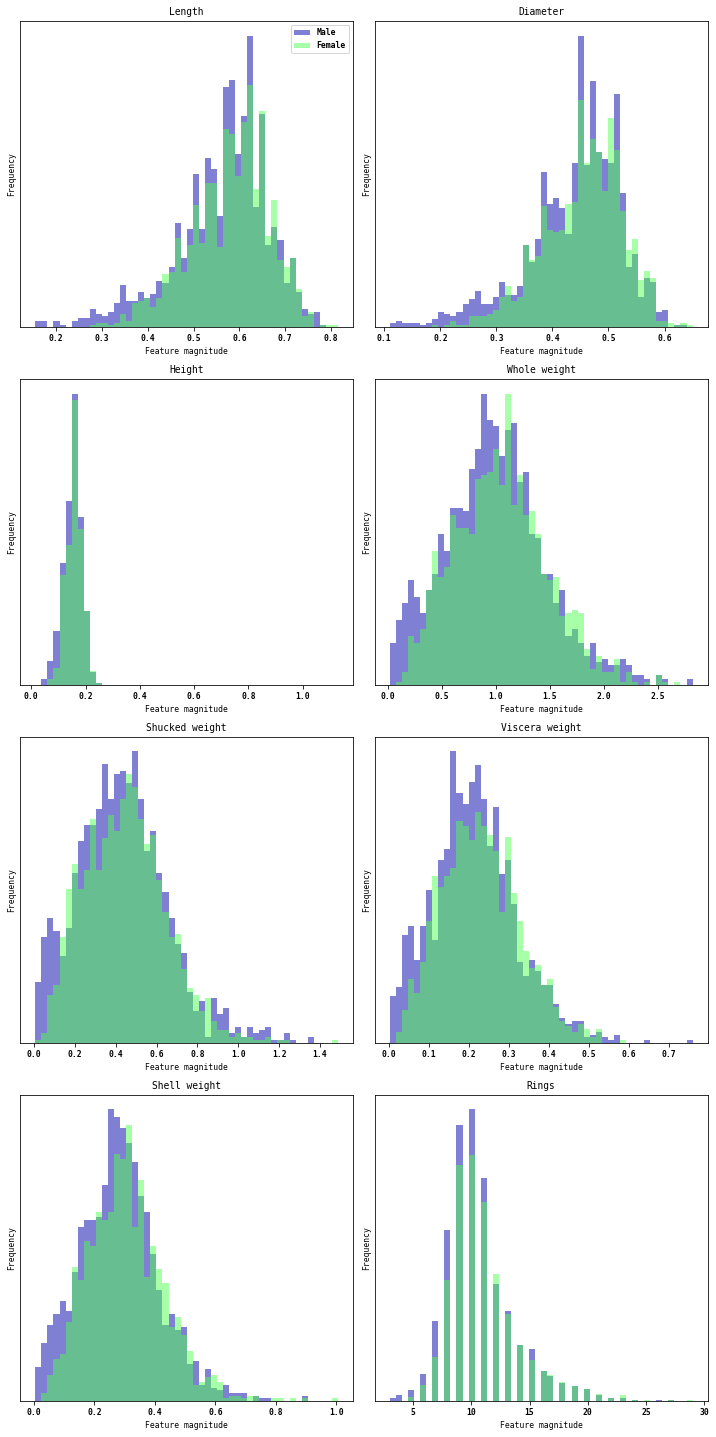

In [80]:
new_names = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']


fig, axes = plt.subplots(4, 2, figsize=(10, 20))
Male = X_bin[y_bin == 0]
Female = X_bin[y_bin == 1]
ax = axes.ravel()
for i in range(8):
    _, bins = np.histogram(X_bin[:, i], bins=50)
    ax[i].hist(Male[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(Female[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(new_names[i])
    ax[i].set_yticks(())
    ax[i].set_xlabel("Feature magnitude")
    ax[i].set_ylabel("Frequency")
ax[0].legend(["Male", "Female"], loc="best")
fig.tight_layout()

In [81]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(X_bin)
X_scaled = scaler.transform(X_bin)

In [82]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA 
pca.fit(X_scaled)
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (2835, 9)
Reduced shape: (2835, 2)


In [83]:
pca.explained_variance_ratio_.sum()

0.94024722173148

In [84]:
from matplotlib import rc
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 22}
rc('font', **font) 

plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 10.0

### PCA can be used for visualization of features.

Text(0, 0.5, 'Second principal component')

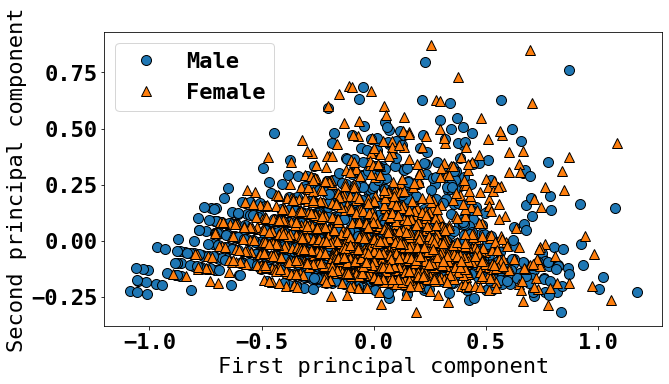

In [85]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(10, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], y_bin)
plt.legend(['Male','Female'], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [87]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 9)


In [88]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.40591522  0.40797162  0.07199024  0.46154525  0.38790092  0.36924533
   0.35222275  0.14091712  0.14091712]
 [-0.08061665 -0.05064503  0.00891364 -0.0871706  -0.2253783  -0.10870655
   0.08540998  0.67577752  0.67577752]]


Text(0, 0.5, 'Principal components')

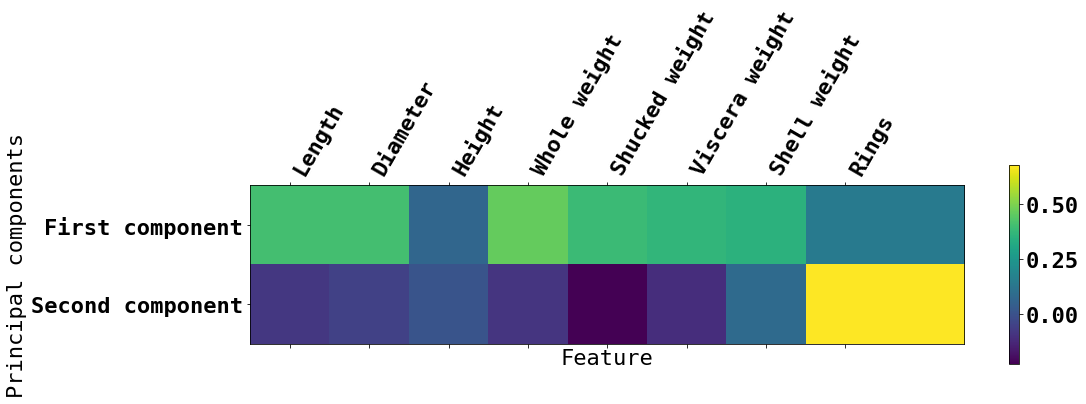

In [89]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(new_names)), new_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

## Applying PCA to the cancer dataset for visualization

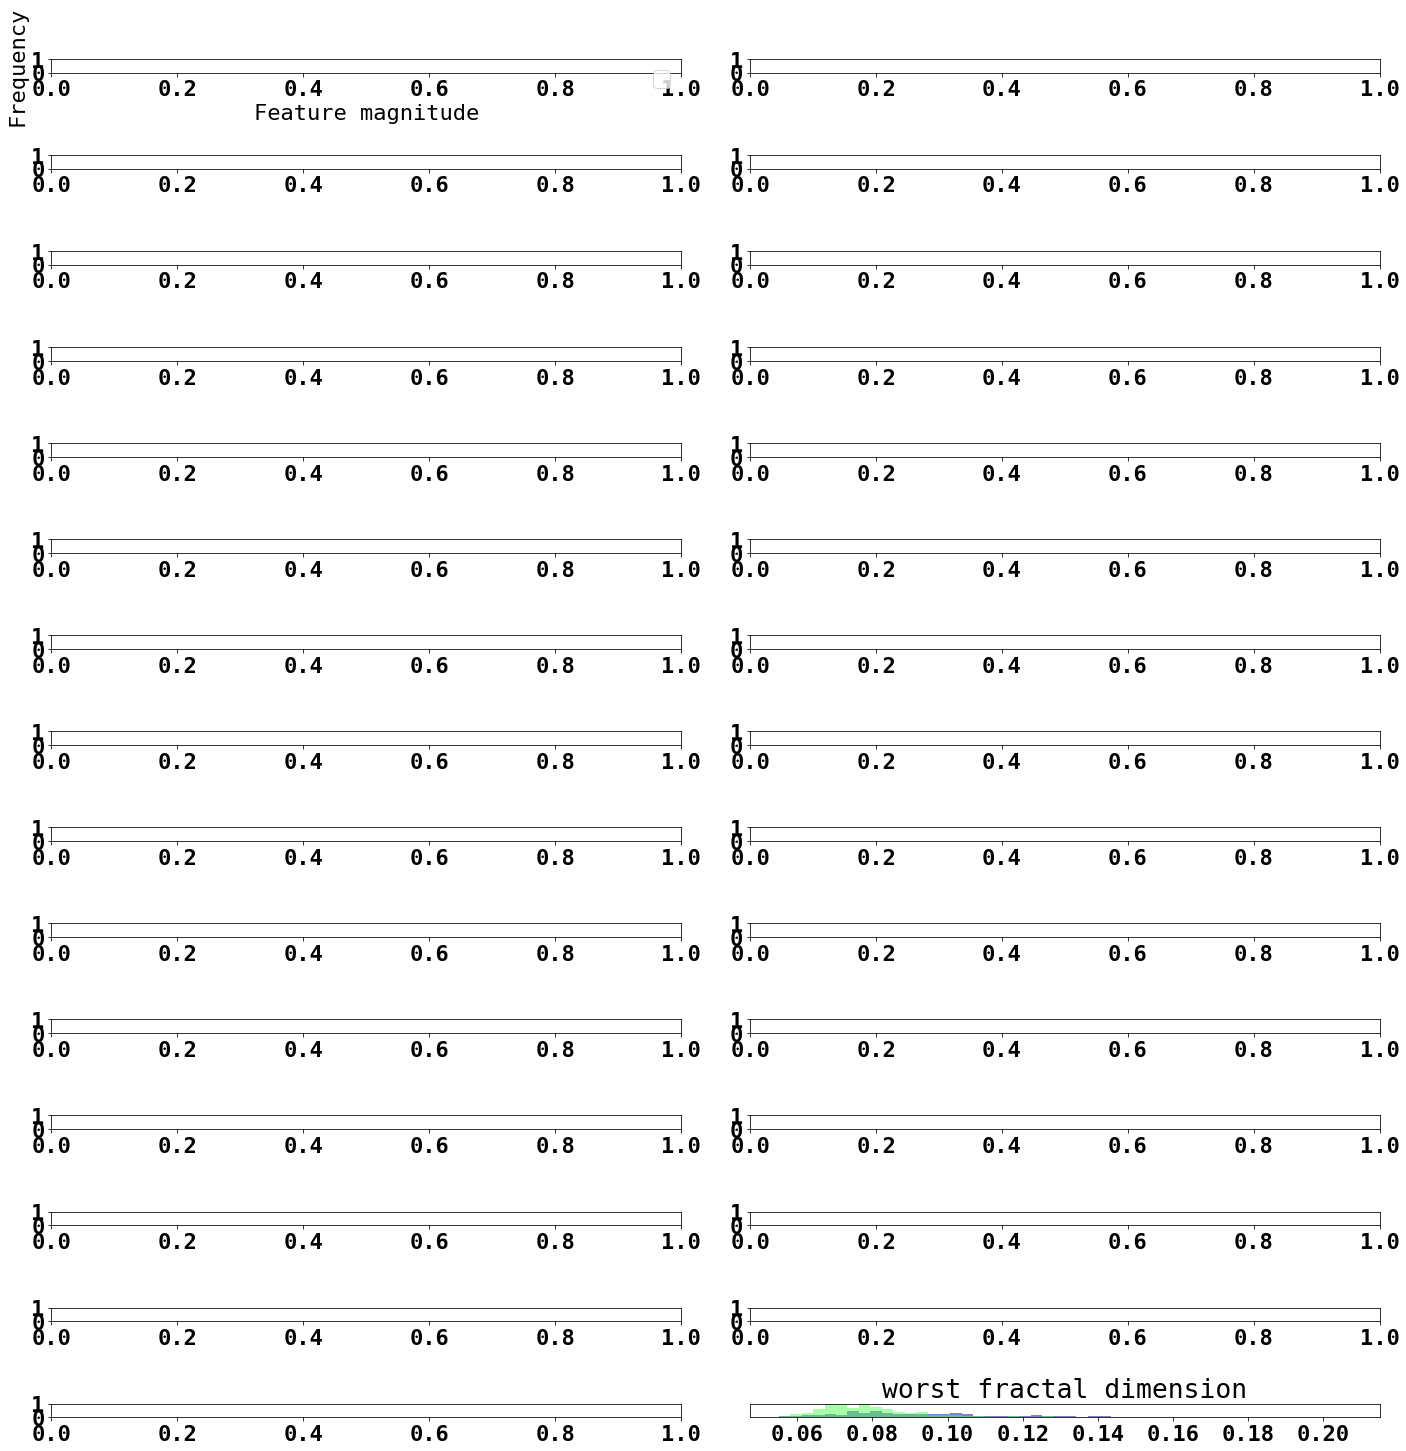

In [105]:

fig, axes = plt.subplots(15, 2, figsize=(20, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
 _, bins = np.histogram(cancer.data[:, i], bins=50)
ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
ax[i].set_title(cancer.feature_names[i])
ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

<center>
<img src="./images/Scatter.png" style="width:1200px">
</center>

However, this plot doesn’t show us anything about the interactions between variables and how these relate to the classes.

Using PCA, we can capture the main interactions and get a slightly more complete picture. We can find the first two principal components, and visualize the data in this new two-dimensional space with a single scatter plot.

In [106]:
# we scale our data so that each feature has unit variance using StandardScaler
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)



In [107]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to breast cancer data
pca.fit(X_scaled)
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


We can now plot the first two principal components

Text(0, 0.5, 'Second principal component')

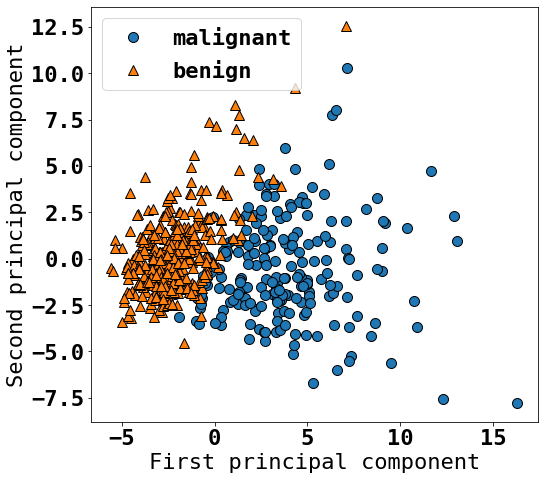

In [108]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [109]:
print("PCA component shape: {}".format(pca.components_.shape))


PCA component shape: (2, 30)


We can also visualize the coefficients using a heat map, which might be
easier to understand

Text(0, 0.5, 'Principal components')

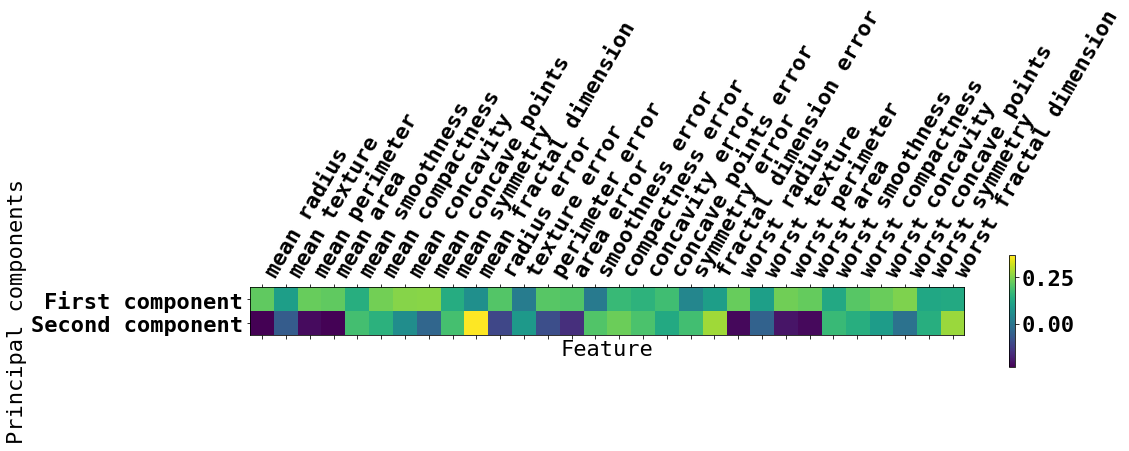

In [110]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

You can see that in the first component, all features have the same sign (it’s negative,
but as we mentioned earlier, it doesn’t matter which direction the arrow points in).

That means that there is a general correlation between all features. As one measurement
is high, the others are likely to be high as well. 

The second component has mixed signs, and both of the components involve all of the 30 features. This mixing of
all features is what makes explaining the axes in Figure 3-6 so tricky

### Eigenfaces for feature extraction

Another application of PCA is feature extraction. The idea behind feature extraction is that it is possible to find a representation of your data that is better suited to analysis than the raw representation you were given. Suitable for images.

In [111]:
from matplotlib import rc
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 12}
rc('font', **font) 

plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 10.0

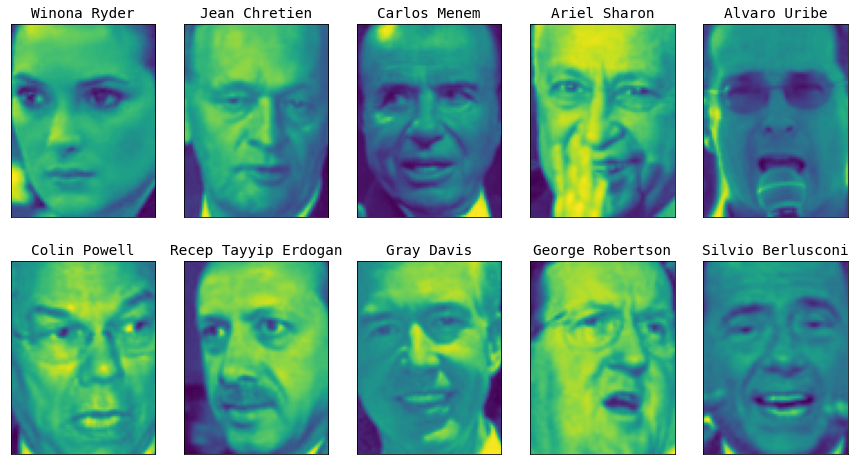

In [112]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8),
subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

There are 3,023 images, each 87×65 pixels large, belonging to 62 different people:

In [113]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [114]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39Alvaro Uribe               35Amelie Mauresmo            21
Andre Agassi               36Angelina Jolie             20Ariel Sharon               77
Arnold Schwarzenegger      42Atal Bihari Vajpayee       24Bill Clinton               29
Carlos Menem               21Colin Powell              236David Beckham              31
Donald Rumsfeld           121George Robertson           22George W Bush             530
Gerhard Schroeder         109Gloria Macapagal Arroyo    44Gray Davis                 26
Guillermo Coria            30Hamid Karzai               22Hans Blix                  39
Hugo Chavez                71Igor Ivanov                20Jack Straw                 28
Jacques Chirac             52Jean Chretien              55Jennifer Aniston           21
Jennifer Capriati          42Jennifer Lopez             21Jeremy Greenstock          24
Jiang Zemin                20John Ashcroft              53John Negroponte            31
Jose Maria Aznar           23Jua

To make the data less skewed, we will only take up to 50 images of each person

In [116]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.


A simple solution is to use a one-nearest-neighbor classifier that looks for the most
similar face image to the face you are classifying. This classifier could in principle
work with only a single training example per class. Let’s take a look at how well
KNeighborsClassifier does here

In [117]:
from sklearn.neighbors import KNeighborsClassifier
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
X_people, y_people, stratify=y_people, random_state=0)
# build a KNeighborsClassifier using one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))


Test set score of 1-nn: 0.23


We obtain an accuracy of 23%, which is not actually that bad for a 62-class classification problem (random guessing would give you around 1/62 = 1.5% accuracy), but is also not great. We only correctly identify a person every fourth time.

This is where PCA comes in.

*Here we use the whitening option of PCA, which rescales the principal components to have the same scale. This is the same as using StandardScaler after the transformation.*

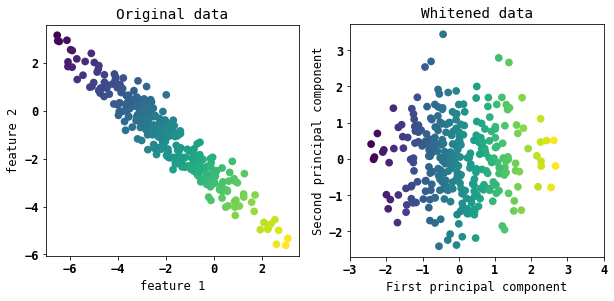

In [118]:
mglearn.plots.plot_pca_whitening()

We fit the PCA object to the training data and extract the first 100 principal components. Then we transform the training and test data:

In [119]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [120]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))


Test set accuracy: 0.31


In [121]:
print("pca.components_.shape: {}".format(pca.components_.shape))


pca.components_.shape: (100, 5655)


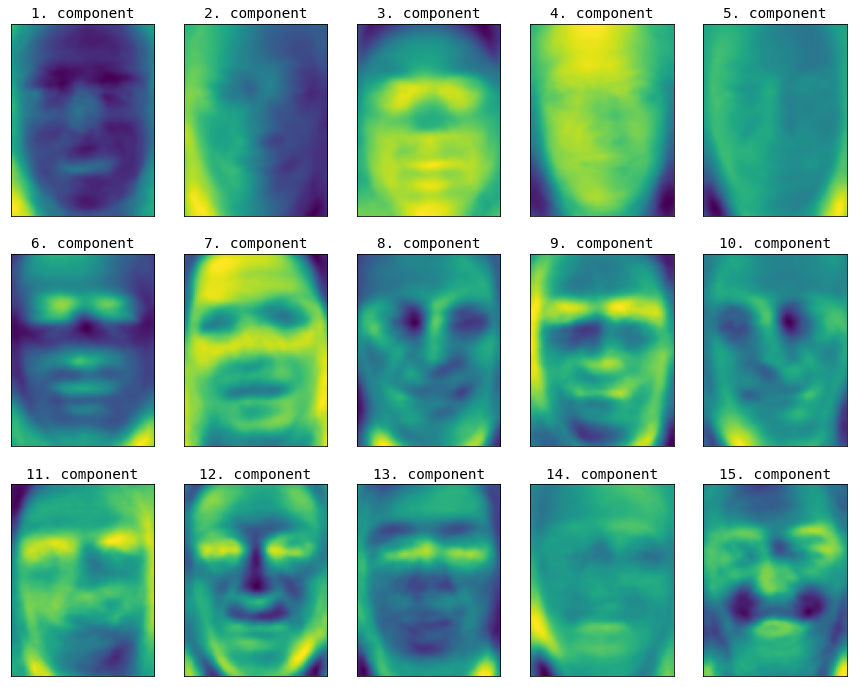

In [122]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
    cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

When asking people to rate similarity of faces,
they are more likely to use attributes like age, gender, facial expression, and hair style,
which are attributes that are hard to infer from the pixel intensities.

### Reconstructing three face images using increasing numbers of principal components

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 2.7s, 0.0min


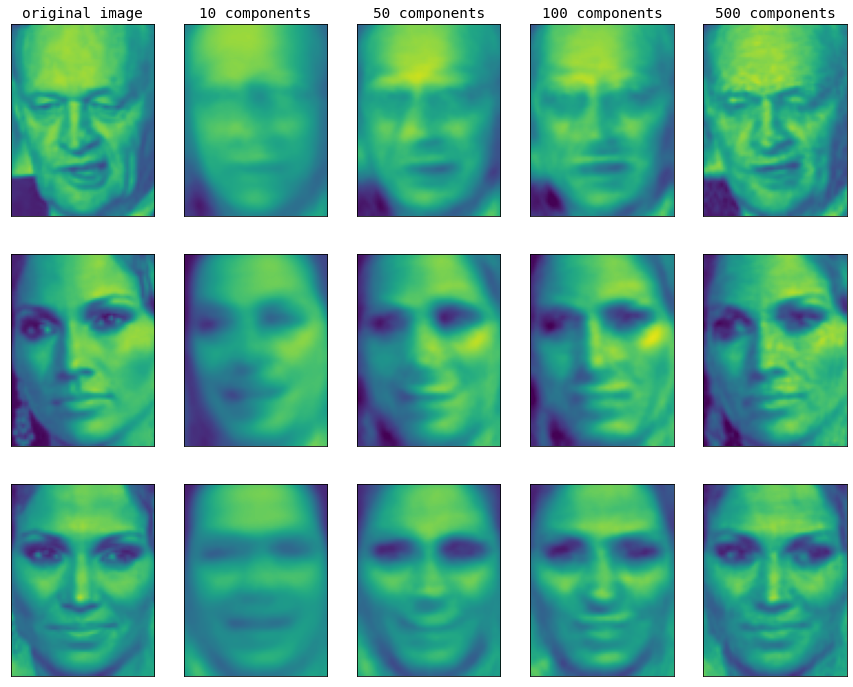

In [70]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

### Schematic view of PCA as decomposing an image into a weighted sum of components

     
<center>
<img src="./images/face.png" style="width:1200px">
</center>

### Scatter plot of the faces dataset using the first two principal components

Text(0, 0.5, 'Second principal component')

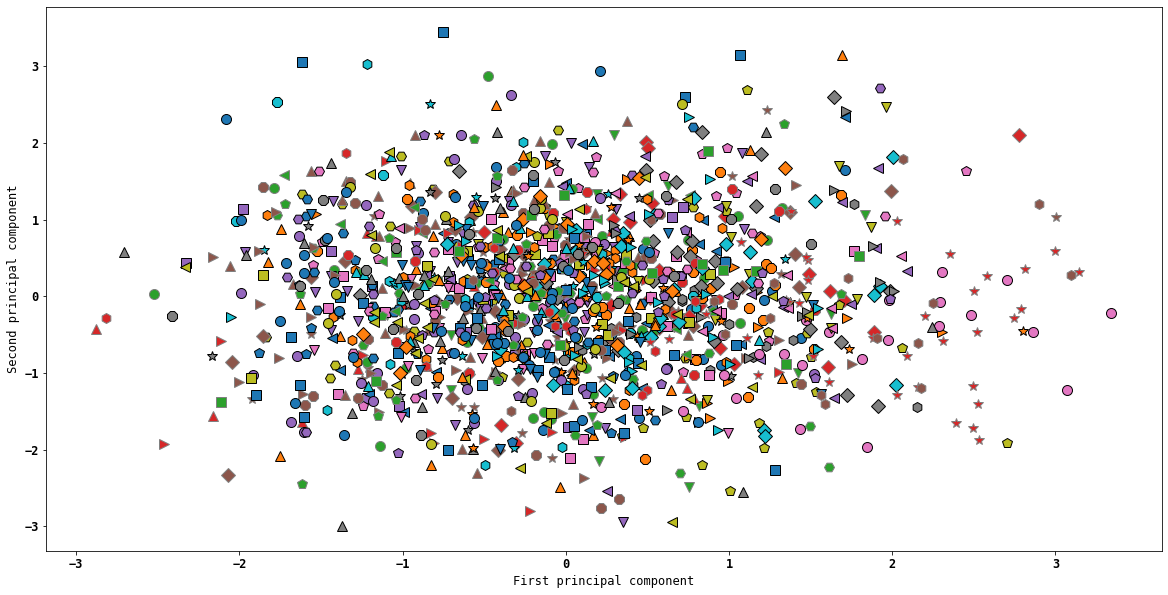

In [126]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

<center>
<img src="./images/00_questions.jpg" style="width:1200px">
</center>

<center>
<img src="./images/00_hands-on.jpg" style="width:1200px">
</center>

# Non-Negative Matrix Factorization (NMF)

* As in PCA, we are trying to write each data point as a weighted sum of some components. 

* But whereas in PCA we wanted components that were orthogonal and that explained as much variance of the data as possible, in NMF, we want the components and the coefficients to be non-negative.

* We want both the components and the coefficients to be greater than or equal to zero. Consequently, this method can only be applied to data where each feature is non-negative.

* Helpful for data that is created as the addition (or overlay) of several independent sources such as music or pictures.

#### Components found by non-negative matrix factorization with two components (left) and one component (right)

/home/peter/.local/lib/python3.6/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/home/peter/.local/lib/python3.6/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


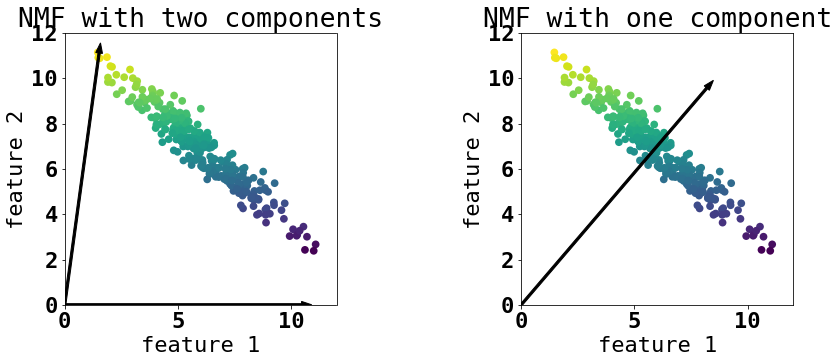

In [100]:
mglearn.plots.plot_nmf_illustration()

For NMF with two components, as shown on the left, it is clear that all points in the
data can be written as a positive combination of the two components. If there are
enough components to perfectly reconstruct the data (as many components as there
are features), the algorithm will choose directions that point toward the extremes of
the data.

If we only use a single component, NMF creates a component that points toward the
mean, as pointing there best explains the data. You can see that in contrast with PCA,
reducing the number of components not only removes some directions, but creates
an entirely different set of components! Components in NMF are also not ordered in
any specific way, so there is no “first non-negative component”: all components play
an equal part.

NMF uses a random initialization, which might lead to different results depending on
the random seed.

### Applying NMF to face images

* The main parameter of NMF is how many components we want to extract.
* Usually this is lower than the number of input features

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))


C:\Users\majdamin\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\majdamin\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\majdamin\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\majdamin\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. 

_____________________________________________________nmf_faces - 930.7s, 15.5min


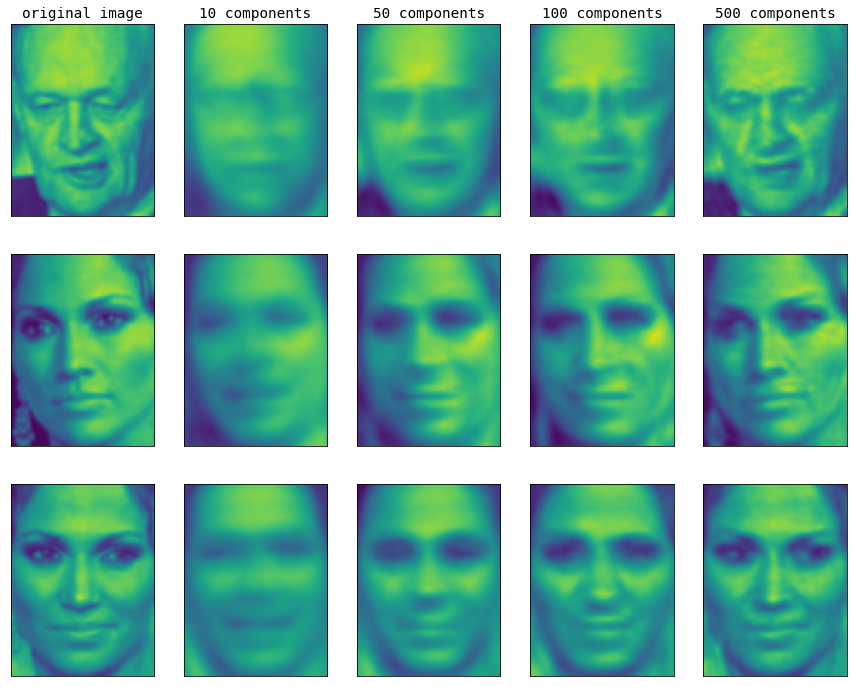

In [128]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

* The quality of the back-transformed data is similar to when using PCA, but slightly worse. 
* PCA finds the optimum directions in terms of reconstruction. 
* NMF is usually not used for its ability to reconstruct or encode data, but rather for finding interesting patterns within the data.

C:\Users\majdamin\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


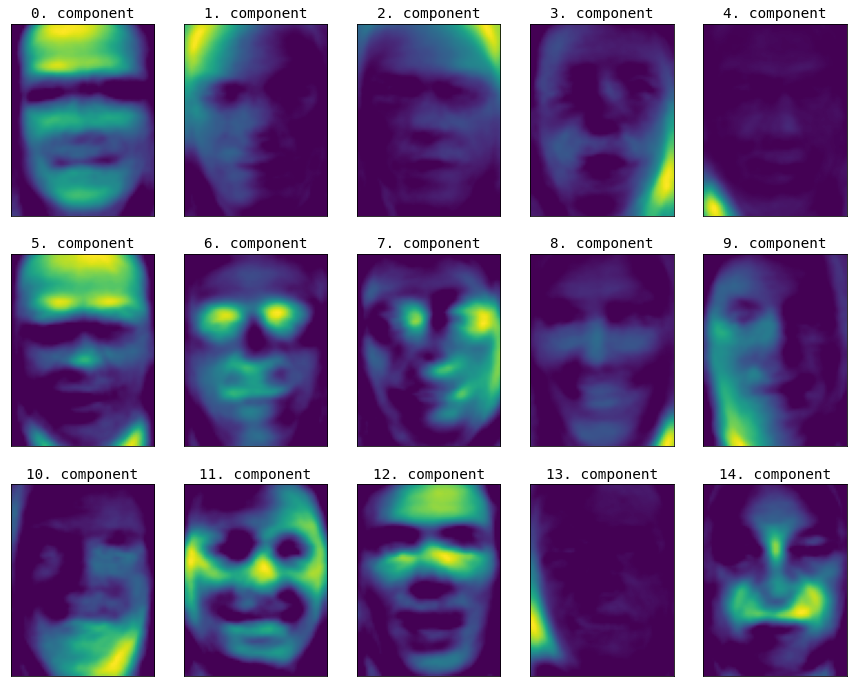

In [129]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)

X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

These components are all positive, and so resemble prototypes of faces much more so
than the components shown for PCA

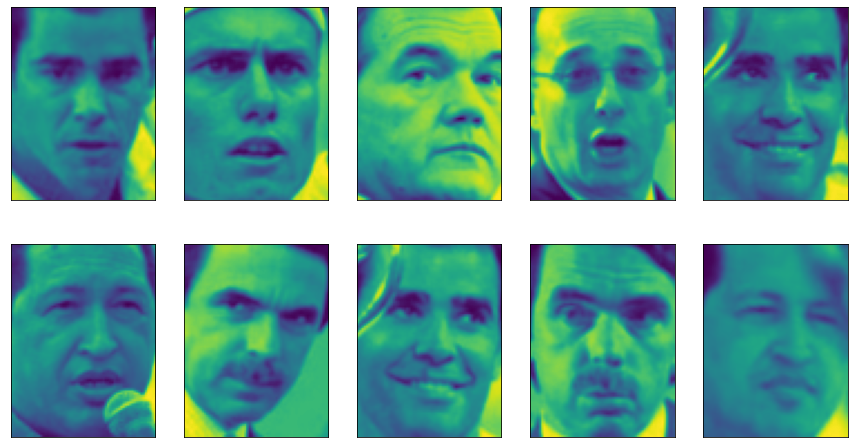

In [75]:
compn = 3
# sort by 4th component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

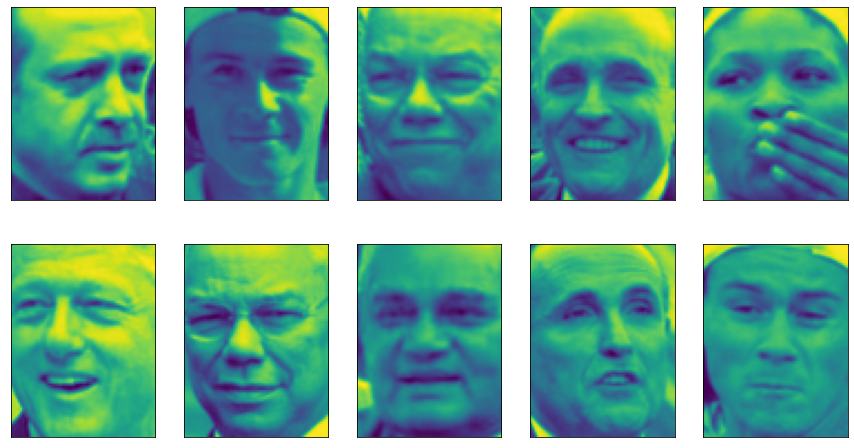

In [76]:
compn = 2
# sort by 3rd component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

<center>
<img src="./images/00_questions.jpg" style="width:1200px">
</center>

<center>
<img src="./images/00_hands-on.jpg" style="width:1200px">
</center>

Let’s say we are interested in a signal that is a combination of three different sources

Text(0, 0.5, 'Signal')

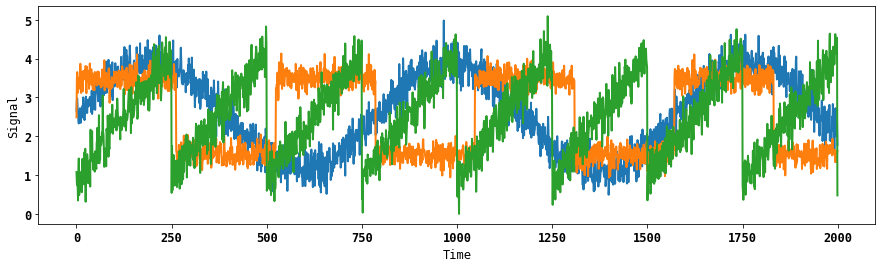

In [133]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(15, 4))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

We want to recover the decomposition of the mixed signal into the
original components.

In [134]:
# mix data into a 100-dimensional state
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))

Shape of measurements: (2000, 100)


We can use NMF to recover the three signals:

In [135]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape))

Recovered signal shape: (2000, 3)


C:\Users\majdamin\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


For comparison, we also apply PCA

In [136]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

Next slide shows the signal activity that was discovered by NMF and PCA

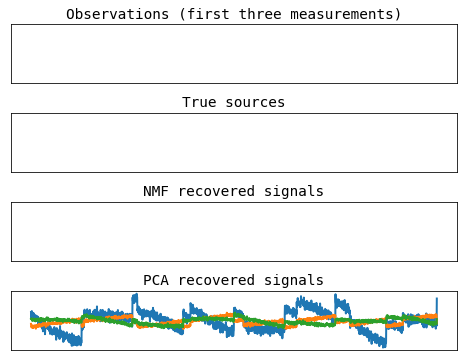

In [139]:
models = [X, S, S_, H]
names = ['Observations (first three measurements)',
 'True sources',
 'NMF recovered signals',
  'PCA recovered signals']
fig, axes = plt.subplots(4, figsize=(8,6), gridspec_kw={'hspace': .5},
subplot_kw={'xticks': (), 'yticks': ()})
for model, name, ax in zip(models, names, axes):
 ax.set_title(name)
ax.plot(model[:, :3], '-')

<center>
<img src="./images/NMF.png" style="width:1200px">
</center>

# Manifold Learning with t-SNE

* t-distributed Stochastic Neighbor Embedding, developed by Geoffrey Hinton and Laurens van der Maaten.

* PCA is often a good first approach for transforming your data so that you might be able to visualize it using a scatter plot.

* Manifold learning algorithms are mainly aimed at visualization.

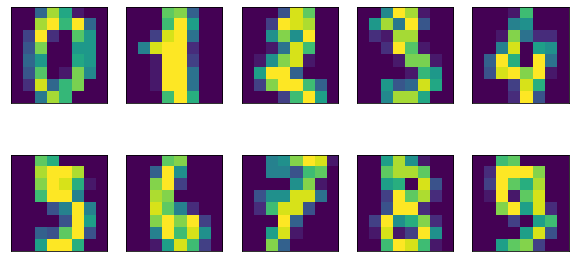

In [140]:
from sklearn.datasets import load_digits
digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

In [141]:
# build a PCA model
def get_pca_fig(cp=2):
    pca = PCA(n_components=cp)
    pca.fit(digits.data)
    # transform the digits data onto the first two principal components
    digits_pca = pca.transform(digits.data)
    colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
    "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
    plt.figure(figsize=(10, 10))
    plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
    plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
    for i in range(len(digits.data)):
        # actually plot the digits as text instead of using scatter
        plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
        color = colors[digits.target[i]],
        fontdict={'weight': 'bold', 'size': 9})
    plt.xlabel("First principal component")
    plt.ylabel("Second principal component")

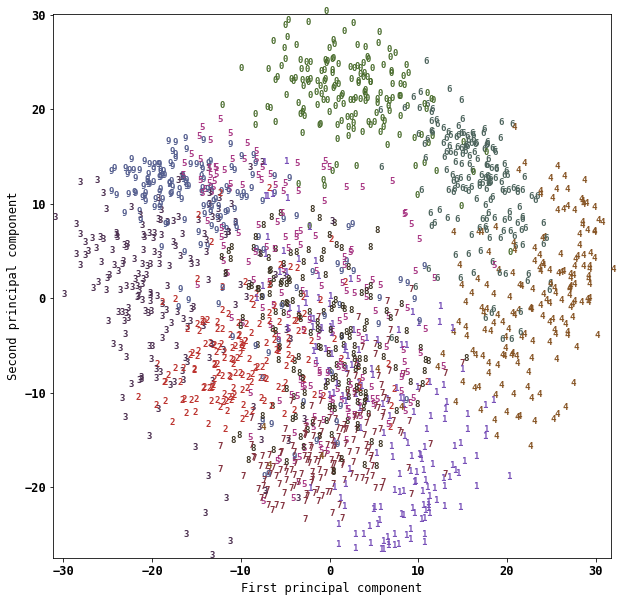

In [142]:
get_pca_fig()

In [143]:
from sklearn.manifold import TSNE

def get_tsne_fig():
    
    colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
    "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
    
    tsne = TSNE(random_state=42)
    # use fit_transform instead of fit, as TSNE has no transform method
    digits_tsne = tsne.fit_transform(digits.data)

    plt.figure(figsize=(10, 10))
    plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
    plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
    for i in range(len(digits.data)):
        # actually plot the digits as text instead of using scatter
        plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
        color = colors[digits.target[i]],
        fontdict={'weight': 'bold', 'size': 9})
    plt.xlabel("t-SNE feature 0")
    plt.ylabel("t-SNE feature 1")

Wall time: 7.55 s


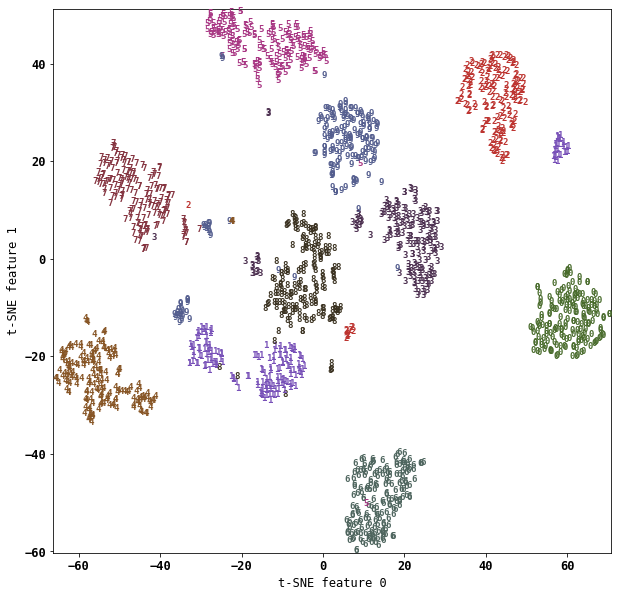

In [144]:
%%time
get_tsne_fig()

<center>
<img src="./images/00_questions.jpg" style="width:1200px">
</center>

<center>
<img src="./images/00_hands-on.jpg" style="width:1100px">
</center>

# Clustering

* Clustering is the task of partitioning the dataset into groups, called clusters.

* The goal is to split up the data in such a way that points within a single cluster are very similar and points in different clusters are different.

## k-Means Clustering

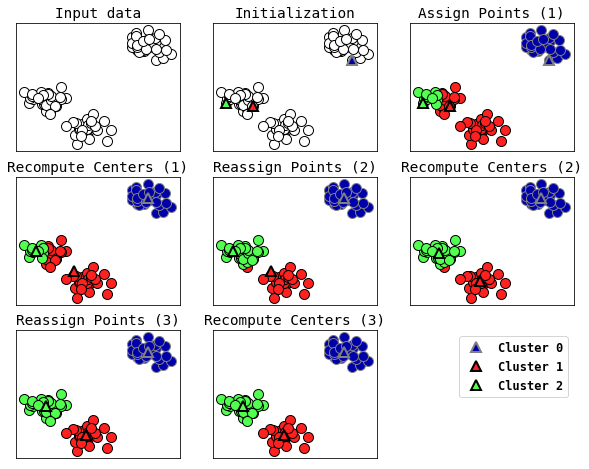

In [145]:
mglearn.plots.plot_kmeans_algorithm()

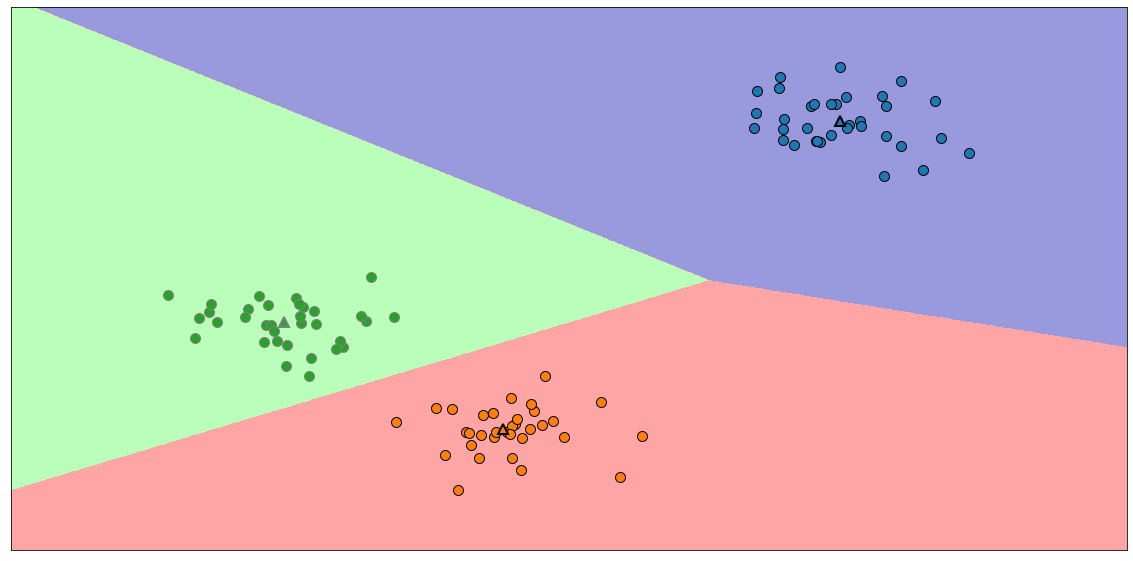

In [146]:
mglearn.plots.plot_kmeans_boundaries()

In [147]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

def get_kmeans_figs():
    X, y = make_blobs(random_state=1)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    # using two cluster centers:
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(X)
    assignments = kmeans.labels_
    mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])
    # using five cluster centers:
    kmeans = KMeans(n_clusters=5)
    kmeans.fit(X)
    assignments = kmeans.labels_
    mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

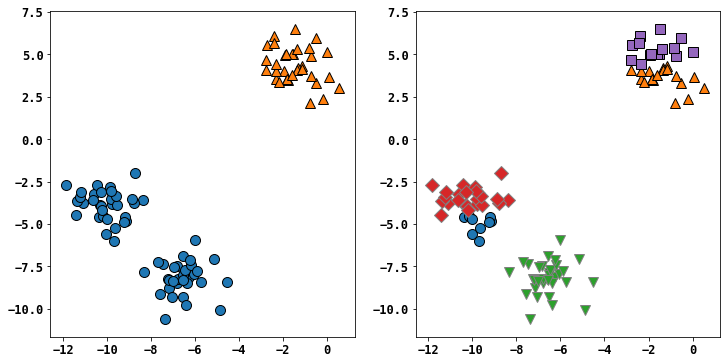

In [148]:
get_kmeans_figs()

# Cluster assignments found by k-means using two clusters (left) and five clusters (right)

### Failure cases of k-means

Even if you know the “right” number of clusters for a given dataset, k-means might not always be able to recover them

In [149]:
from matplotlib import rc
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 25}
rc('font', **font) 

plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['lines.linewidth'] = 15.0
plt.rcParams['lines.markersize'] = 15.0

Text(0, 0.5, 'Feature 1')

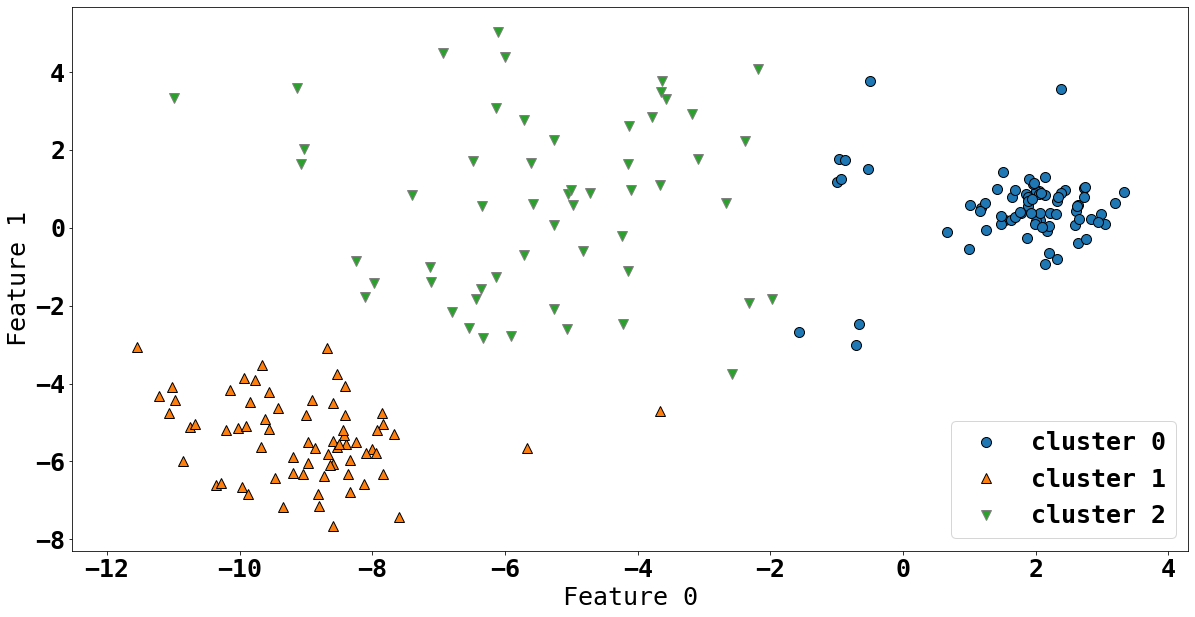

In [151]:
X_varied, y_varied = make_blobs(n_samples=200,
cluster_std=[1.0, 2.5, 0.5],
random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Cluster memberships:
[4 7 6 9 7 7 4 1 4 1 8 3 7 1 0 4 2 3 2 0 5 1 2 1 8 6 7 5 6 2 4 8 1 6 4 5 3
 4 0 6 3 8 2 6 7 8 4 0 6 1 0 3 5 9 1 4 2 1 2 8 3 9 7 4 1 9 8 7 8 9 3 9 3 6
 1 9 6 4 2 3 5 8 3 5 6 8 4 8 3 5 2 4 5 0 5 7 7 3 9 6 1 5 8 4 9 6 9 8 7 2 0
 8 8 9 4 1 2 5 3 4 4 0 6 8 6 0 4 6 1 5 4 0 9 3 1 7 1 9 5 4 6 6 2 8 8 4 6 1
 2 6 3 7 4 2 3 8 1 3 2 2 6 1 2 7 3 7 2 3 7 1 2 9 0 0 6 1 5 0 0 2 7 0 5 7 5
 2 8 3 9 0 9 2 4 4 6 0 5 6 2 7]


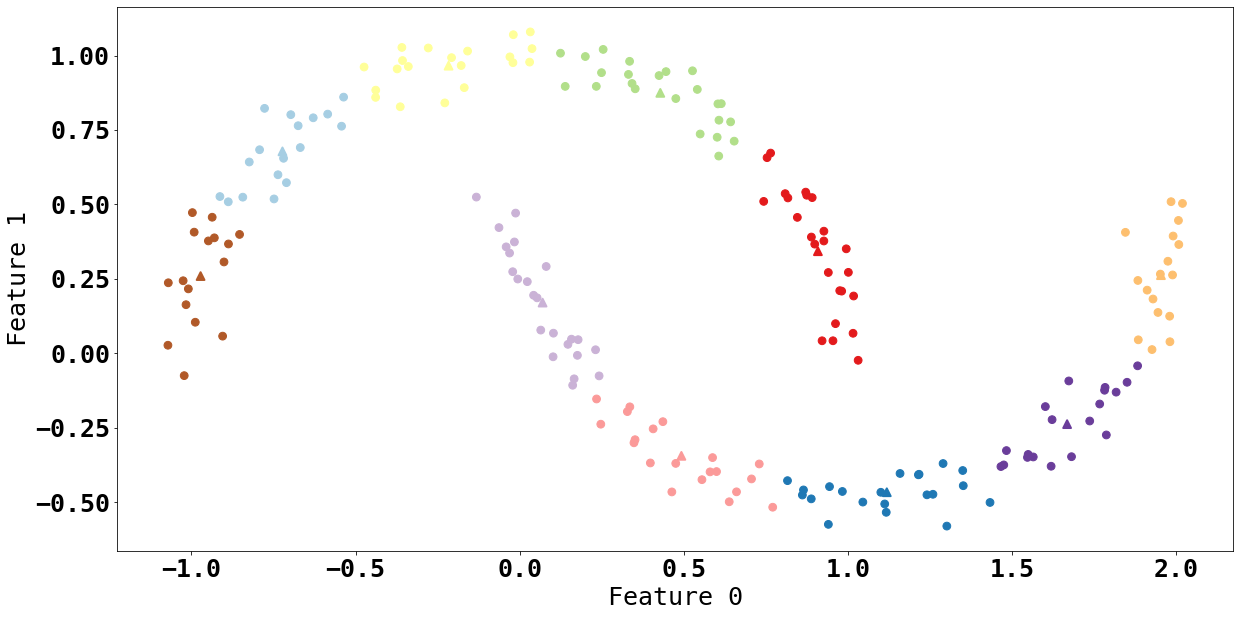

In [152]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster memberships:\n{}".format(y_pred))

<center>
<img src="./images/00_questions.jpg" style="width:1200px">
</center>

<center>
<img src="./images/00_hands-on.jpg" style="width:1100px">
</center>

## Hands-on exercise



In [ ]:
# Run kMeans with 3 clusters on Xw
#Start       




#END

assignments = kmeans.labels_plt.scatter(Xw[:, 0], Xw[:, 1], c=assignments)
#mglearn.discrete_scatter(Xw[:, 0], Xw[:, 1], assignments, ax=axes[0])

In [ ]:
# First preprocessing by PCA


#Run the kMeans and plot the result



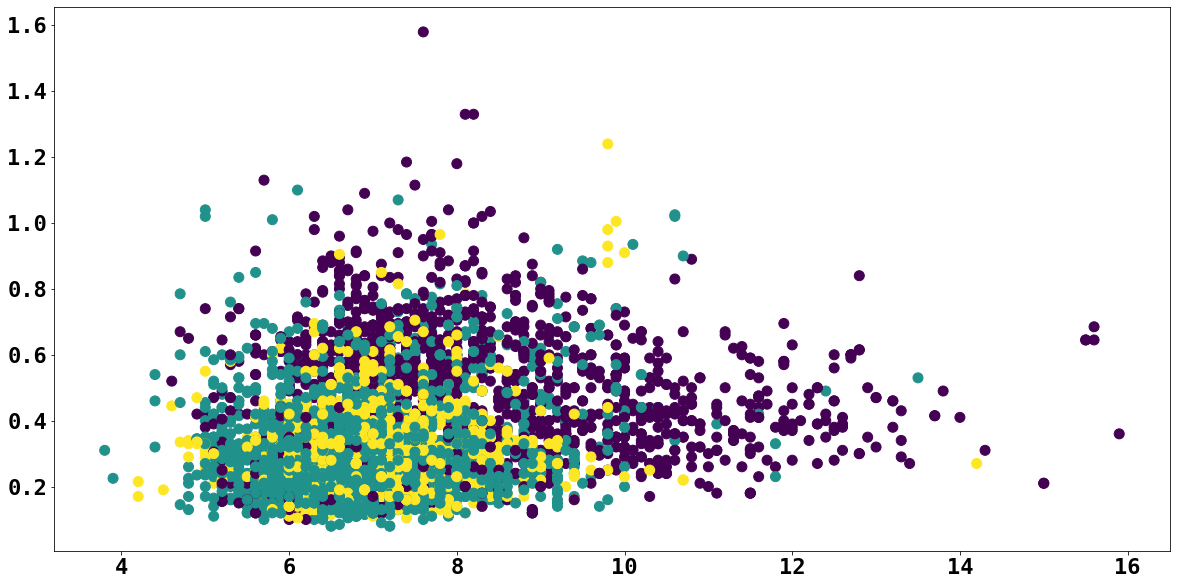

In [117]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(Xw)
assignments = kmeans.labels_
plt.scatter(Xw[:, 0], Xw[:, 1], c=assignments)
#mglearn.discrete_scatter(Xw[:, 0], Xw[:, 1], assignments, ax=axes[0])

In [153]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

Text(0, 0.5, 'Feature 1')

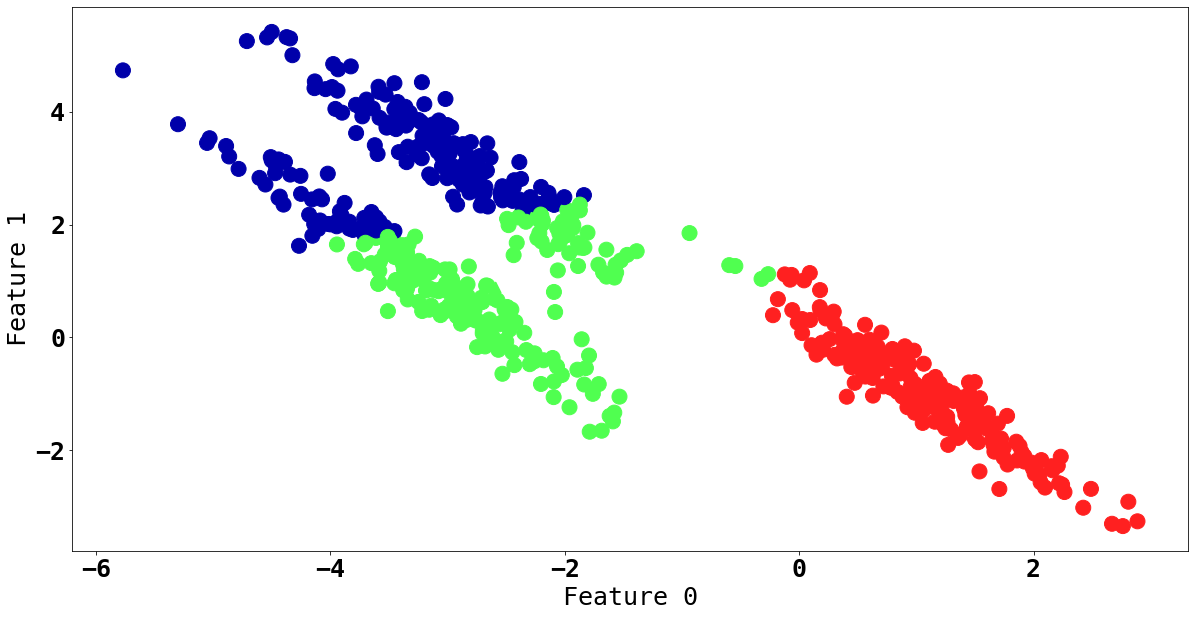

In [154]:
# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)
# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
marker='^', c=[0, 1, 2], s=100, linewidth=2, cmap=mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

k-means also performs poorly if the clusters have more complex shapes, like the
two_moons data

Text(0, 0.5, 'Feature 1')

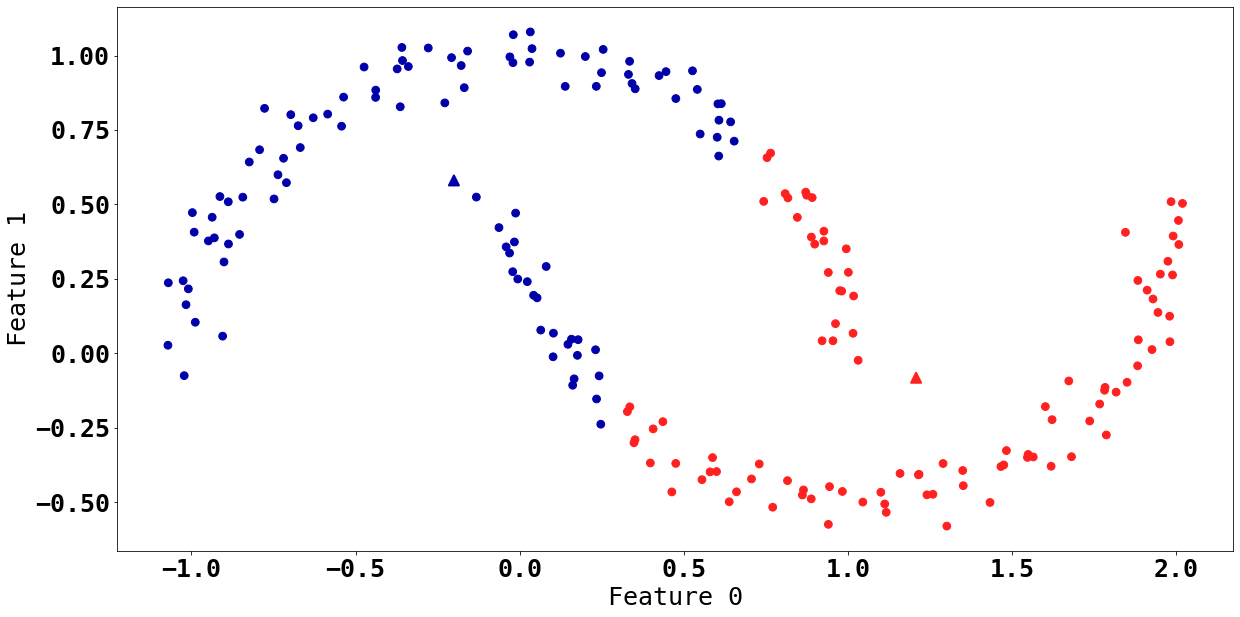

In [155]:
# generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Cluster memberships:
[4 7 6 9 7 7 4 1 4 1 8 3 7 1 0 4 2 3 2 0 5 1 2 1 8 6 7 5 6 2 4 8 1 6 4 5 3
 4 0 6 3 8 2 6 7 8 4 0 6 1 0 3 5 9 1 4 2 1 2 8 3 9 7 4 1 9 8 7 8 9 3 9 3 6
 1 9 6 4 2 3 5 8 3 5 6 8 4 8 3 5 2 4 5 0 5 7 7 3 9 6 1 5 8 4 9 6 9 8 7 2 0
 8 8 9 4 1 2 5 3 4 4 0 6 8 6 0 4 6 1 5 4 0 9 3 1 7 1 9 5 4 6 6 2 8 8 4 6 1
 2 6 3 7 4 2 3 8 1 3 2 2 6 1 2 7 3 7 2 3 7 1 2 9 0 0 6 1 5 0 0 2 7 0 5 7 5
 2 8 3 9 0 9 2 4 4 6 0 5 6 2 7]


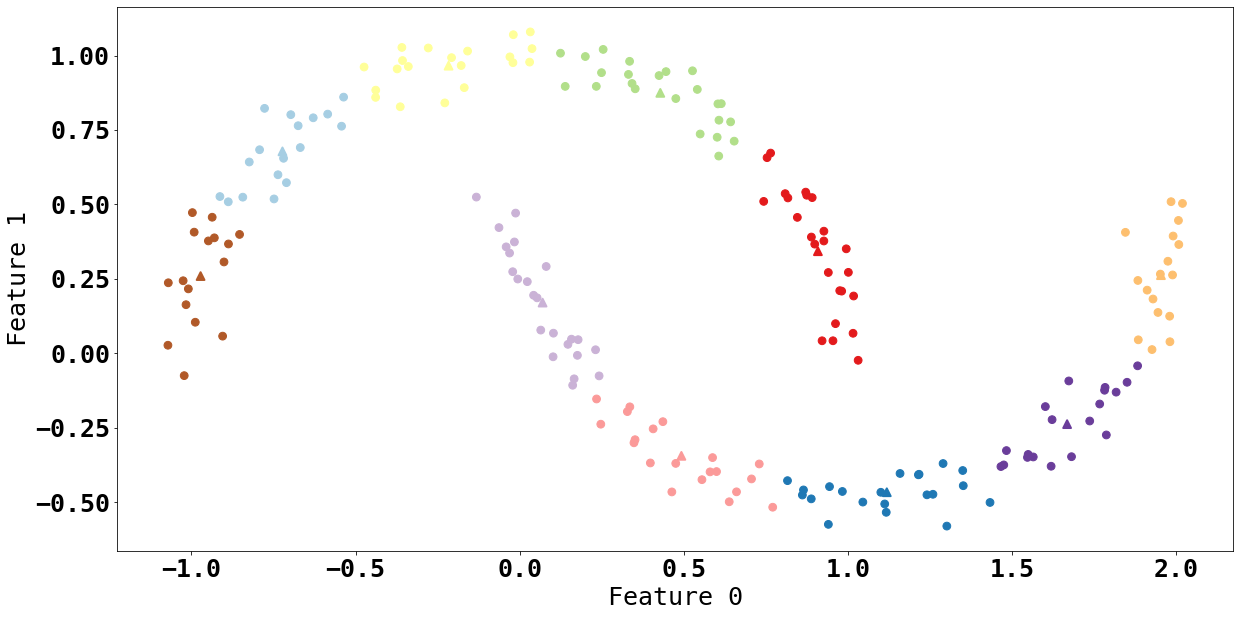

In [156]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster memberships:\n{}".format(y_pred))

# Agglomerative Clustering

* It refers to a collection of clustering algorithms that all build upon the same principles: the algorithm starts by declaring each point its own cluster, and then merges the two most similar clusters until some stopping criterion is satisfied.

* The stopping criterion implemented in scikit-learn is the number of clusters, so similar clusters are merged until only the specified number of clusters are left

* There are several linkage criteria that specify how exactly the “most similar cluster” is measured.
     * ward : merge such that the variance within all clusters increases the least
     * average : merges the two clusters that have the smallest average distance between all their points
     * complete : merges the two clusters that have the smallest maximum distance between their points
     
* https://hlab.stanford.edu/brian/forming_clusters.htm

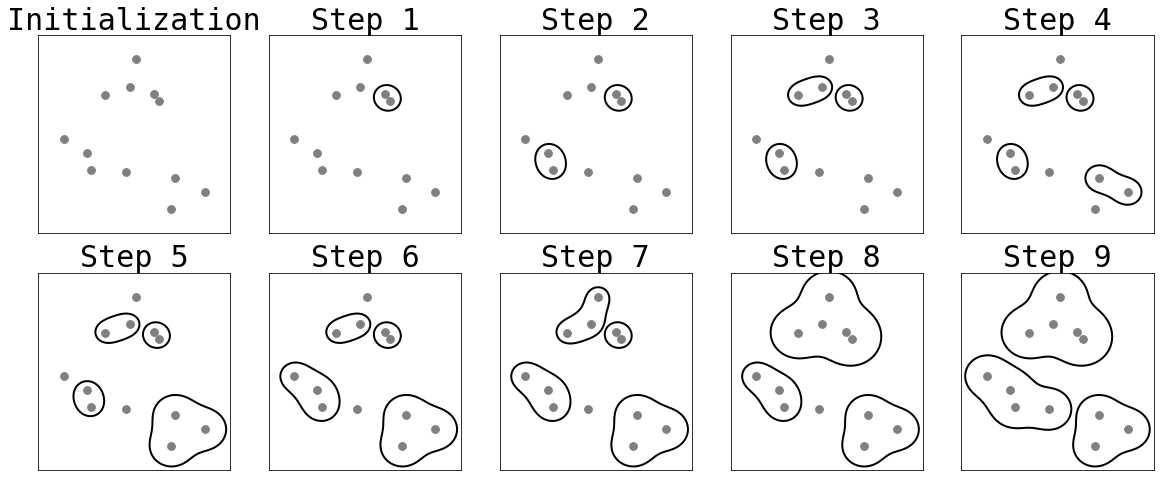

In [157]:
mglearn.plots.plot_agglomerative_algorithm()

* Ward works on most datasets, and we will use it in our examples. 
* If the clusters have very dissimilar numbers of members (if one is much bigger than all the others, for example), average or complete might work better.

### Hierarchical clustering and dendrograms

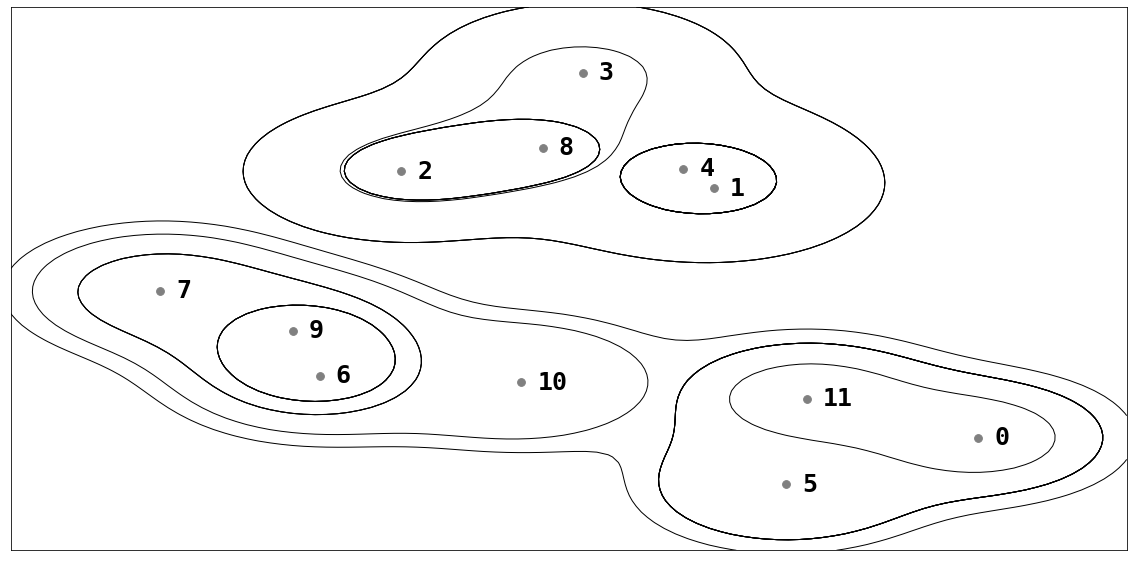

In [158]:
mglearn.plots.plot_agglomerative()

In [159]:
from matplotlib import rc
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 15}
rc('font', **font) 

plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['lines.linewidth'] = 8.0
plt.rcParams['lines.markersize'] = 5.0

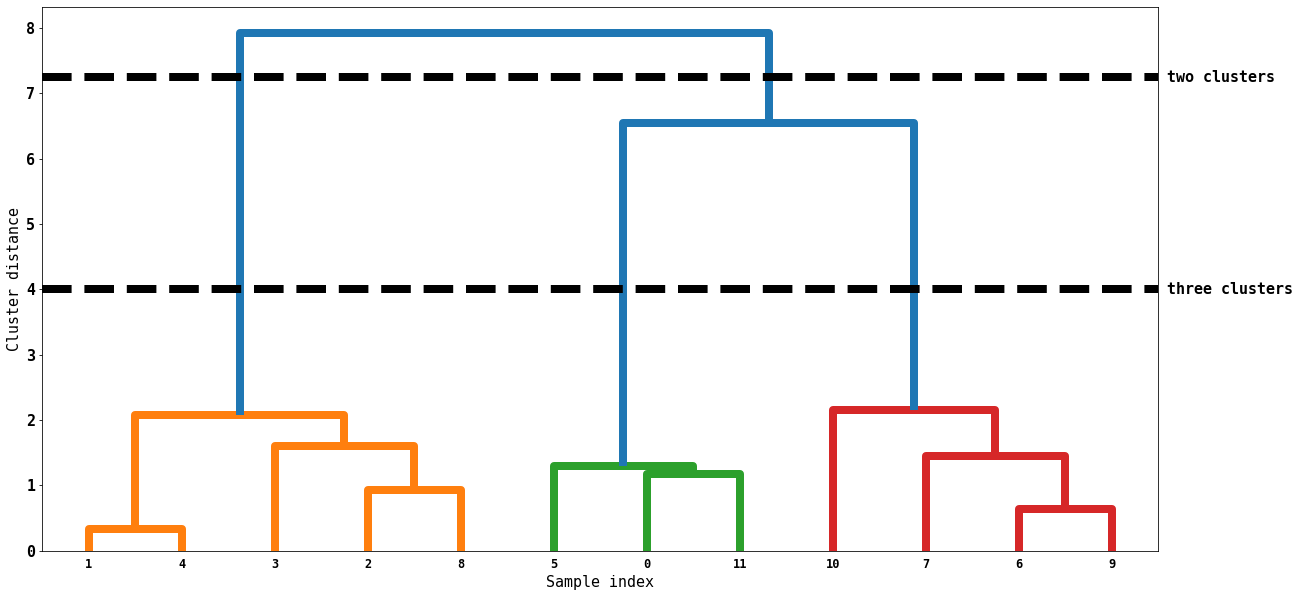

In [160]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

#def plot_dendro():
X, y = make_blobs(random_state=0, n_samples=12)
# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X)

# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)
# Mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

Text(0, 0.5, 'Feature 1')

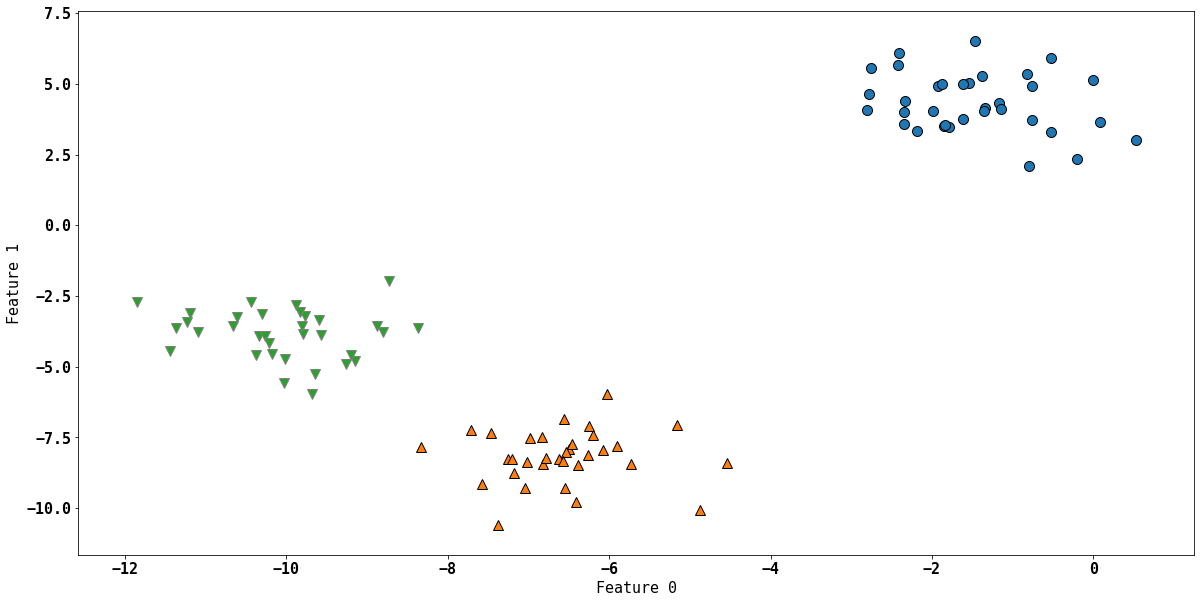

In [161]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

<center>
<img src="./images/00_questions.jpg" style="width:1200px">
</center>

# DBSCAN

* Density-Based Spatial Clustering of Applications with Noise.
* The main benefits of DBSCAN are that it does not require the user to set the number of clusters a priori
* it can capture clusters of complex shapes, and it can identify points that are not part of any cluster.
* DBSCAN is somewhat slower than agglomerative clustering and k-means, but still scales to relatively large datasets.

In [94]:
from matplotlib import rc
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 8}
rc('font', **font) 

plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['lines.linewidth'] = 8.0
plt.rcParams['lines.markersize'] = 5.0

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


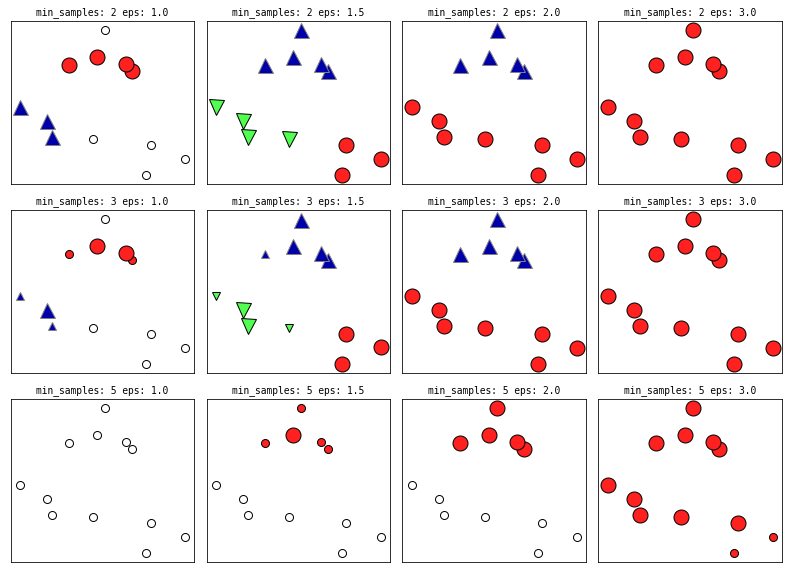

In [95]:
mglearn.plots.plot_dbscan()

Text(0, 0.5, 'Feature 1')

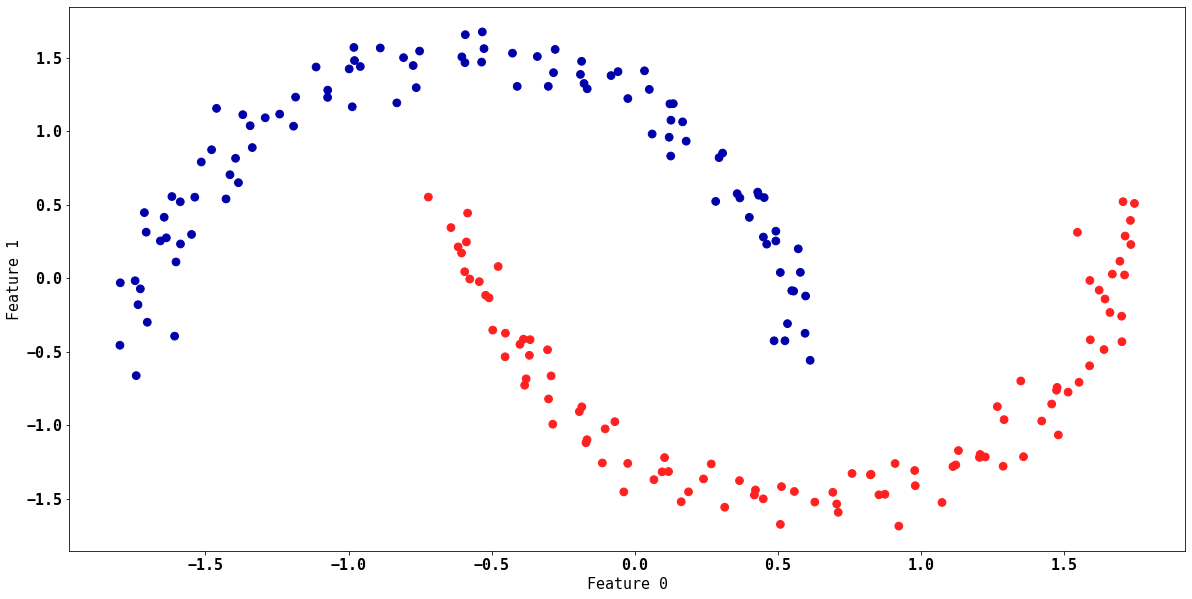

In [164]:
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

<center>
<img src="./images/00_questions.jpg" style="width:1200px">
</center>

# Comparing and Evaluating Clustering Algorithms

Two main metrics when we know ground truth:
* Adjusted rand index (ARI) 
* Normalized mutual information (NMI)

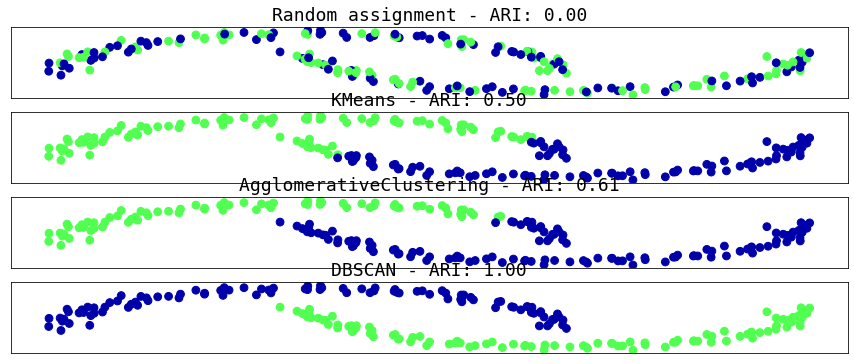

In [170]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig, axes = plt.subplots(4, 1, figsize=(15, 6),
subplot_kw={'xticks': (), 'yticks': ()})
# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
DBSCAN()]
# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))
for ax, algorithm in zip(axes[1:], algorithms):
# plot the cluster assignments and cluster centers
 clusters = algorithm.fit_predict(X_scaled)
 ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
 ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))

# Evaluating clustering without ground truth

* silhouette coefficient

The silhouette score computes the compactness of a cluster, where higher is better, with a perfect score of 1


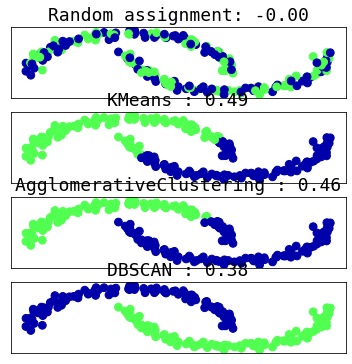

In [174]:
from sklearn.metrics.cluster import silhouette_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig, axes = plt.subplots(4, 1, figsize=(6, 6),
subplot_kw={'xticks': (), 'yticks': ()})
# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
silhouette_score(X_scaled, random_clusters)))
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
DBSCAN()]
for ax, algorithm in zip(axes[1:], algorithms):
 clusters = algorithm.fit_predict(X_scaled)
 # plot the cluster assignments and cluster centers
 ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,s=60)
 ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
 silhouette_score(X_scaled, clusters)))

# Conclusions about Clustering Methods

*  k-means, DBSCAN, and agglomerative clustering have a way of controlling the granularity of clustering.
* k-means and agglomerative clustering allow you to specify the number of desired clusters, while DBSCAN lets you define proximity using the eps parameter, which indirectly influences cluster size.
* All three methods can be used on large, real-world datasets, are relatively easy to understand, and allow for clustering into many clusters.

<center>
<img src="./images/00_hmw.png" style="width:1000px">
</center>

# Unsupervised Learning - Assignment

Designed by Amin Majd

<amin.majd@arcada.fi>

1. Data normalization
    - Look at features of Linnerud dataset, tell what is the problem with them  
    <span style="color: green">from sklearn.datasets import load_linnerud</span>  
    https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_linnerud.html
    - Normalize these features using a correct method. Plot original vs normalized probability density.

2. Dimensionality reduction
    - Load 20 News Dataset  
    <span style="color: green">from sklearn.datasets import fetch_20newsgroups_vectorized</span>  
    <span style="color: green">data = fetch_20newsgroups_vectorized(subset='train')</span> 
          
    - Use KernelPCA for dimensionality reduction. Train a classifier at different nr of dimensions, check how model score changes with dimensions
          Remember that you can load training and testing subsets of data!

3. Clustering
    - Cluster 20 News Dataset into 20 clusters. Print true class vs cluster distribution. 
          Did you manage to recover the original clusters?  (An example below)

In [ ]:
from sklearn.datasets import fetch_20newsgroups_vectorized
data = fetch_20newsgroups_vectorized(subset='train')
X = data['data']
Y = data['target']

# some generated clusters
Clusters = Y.copy()
Clusters[:3000] = 3

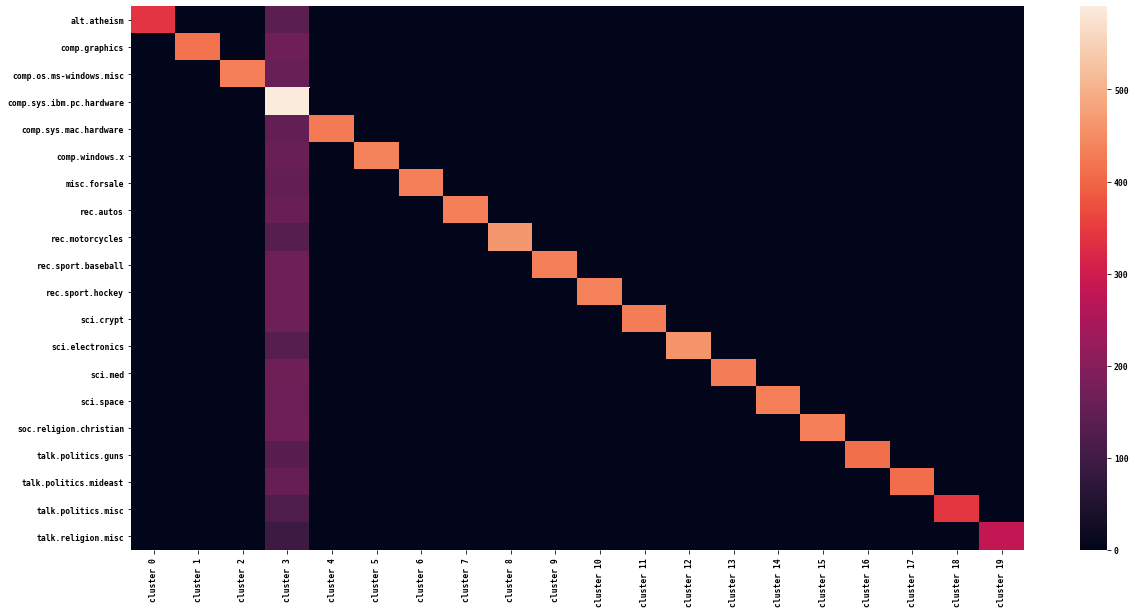

In [98]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

cm = confusion_matrix(Y, Clusters)
sn.heatmap(cm, yticklabels=data['target_names'], 
           xticklabels=["cluster {}".format(i) for i in range(20)])